In [1]:
import pandas as pd

df=pd.read_csv('./data/all_baby_2.csv',index_col=['updated'])
df.index = pd.to_datetime(df.index)
df

,device_id,days,sex,temperature,humidity,voc
updated,,,,,,
2023-01-31 19:24:00,2179.0,729.0,1.0,2849.380952,4434.833333,10807.690476
2023-01-31 19:25:00,2179.0,729.0,1.0,2849.516667,4436.750000,10756.050000
2023-01-31 19:26:00,2179.0,729.0,1.0,2849.550000,4429.900000,10719.116667
2023-01-31 19:27:00,2179.0,729.0,1.0,2849.850000,4429.866667,10656.883333
2023-01-31 19:28:00,2179.0,729.0,1.0,2849.966667,4430.666667,10544.133333
...,...,...,...,...,...,...
2023-02-04 04:23:00,1627.0,1009.0,1.0,2804.733333,3794.916667,0.000000
2023-02-04 04:24:00,1627.0,1009.0,1.0,2850.033333,3861.383333,0.000000
2023-02-04 04:25:00,1627.0,1009.0,1.0,2752.683333,3733.433333,0.000000


In [2]:
df['device_id'] = df['device_id'].apply(lambda x:int(x))

In [3]:
df['device_id'].value_counts(ascending=False).to_dict()

{2179: 153919,
 2489: 153730,
 2410: 153538,
 1816: 152799,
 2411: 152274,
 357: 142957,
 2532: 138859,
 1703: 138095,
 788: 137511,
 2485: 131778,
 2273: 121655,
 1766: 121257,
 356: 116645,
 1553: 115518,
 2510: 103696,
 1713: 98777,
 2530: 94113,
 2013: 92214,
 2132: 91339,
 442: 90945,
 491: 84069,
 2534: 82924,
 606: 76086,
 0: 73893,
 2427: 72089,
 2230: 71657,
 2290: 69320,
 2143: 66921,
 1702: 58969,
 2408: 56367,
 2431: 52402,
 1908: 50666,
 2402: 46063,
 979: 45703,
 1504: 43170,
 695: 41406,
 1225: 38867,
 2420: 38268,
 2516: 37615,
 2526: 35458,
 2289: 33755,
 1954: 24609,
 2419: 21915,
 1416: 21801,
 2491: 19099,
 1910: 18680,
 2252: 17211,
 1877: 15494,
 2103: 13250,
 2524: 12534,
 2538: 10138,
 2439: 8659,
 2195: 7872,
 2220: 7341,
 2542: 7304,
 2127: 5782,
 2509: 4945,
 2535: 4204,
 2512: 4093,
 1304: 3650,
 1846: 3163,
 1970: 3051,
 2537: 2894,
 1627: 2421,
 2407: 2395,
 2541: 2377,
 563: 2346,
 1260: 2313,
 2271: 2300,
 2504: 2219,
 2307: 2166,
 2231: 2012,
 2544: 176

device_id
2510    103696 삭제
1713     98777
2530     94113
2013     92214 삭제
2132     91339
442      90945 삭제
491      84069 삭제
2534     82924
606      76086 삭제
0        73893 삭제
2427     72089 삭제
2230     71657 삭제
2290     69320
2143     66921 삭제
Name: count, dtype: int64

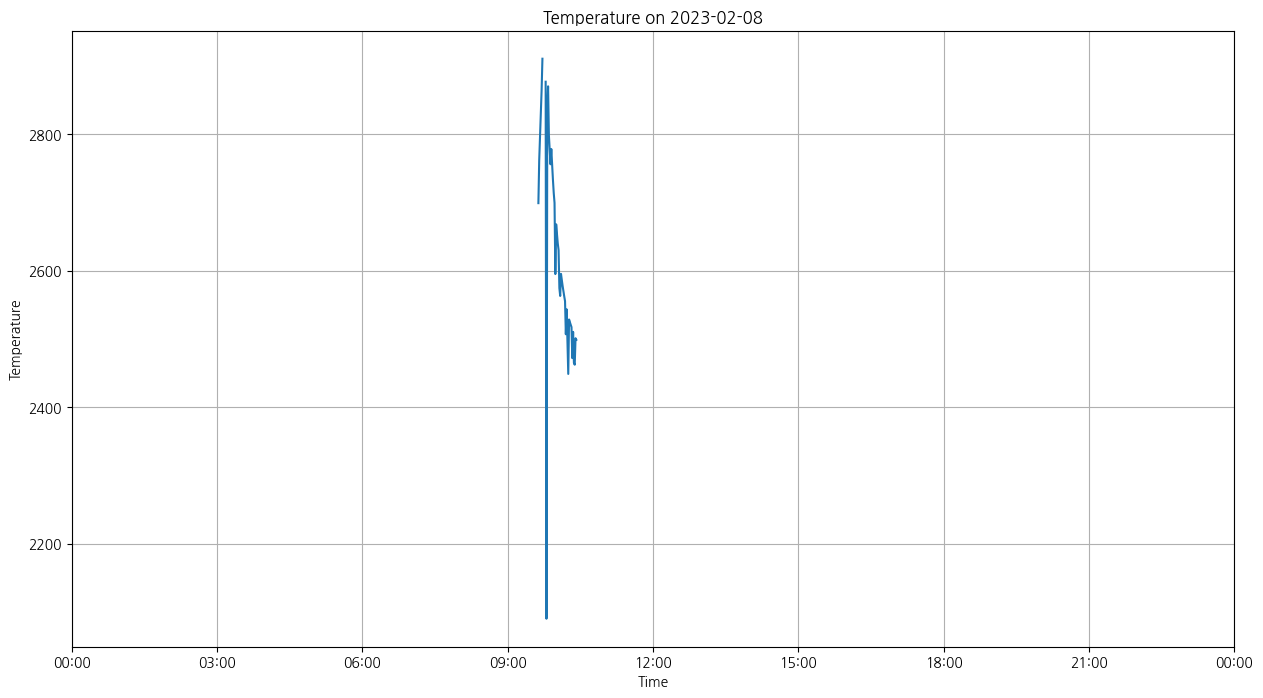

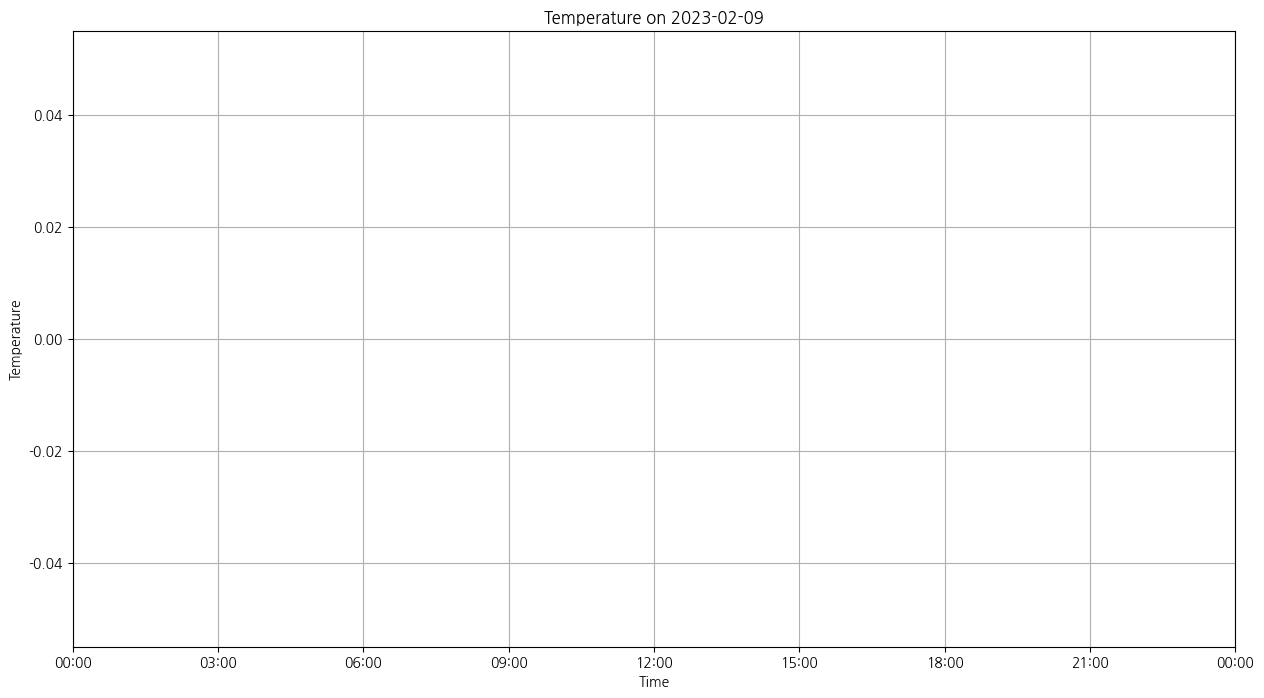

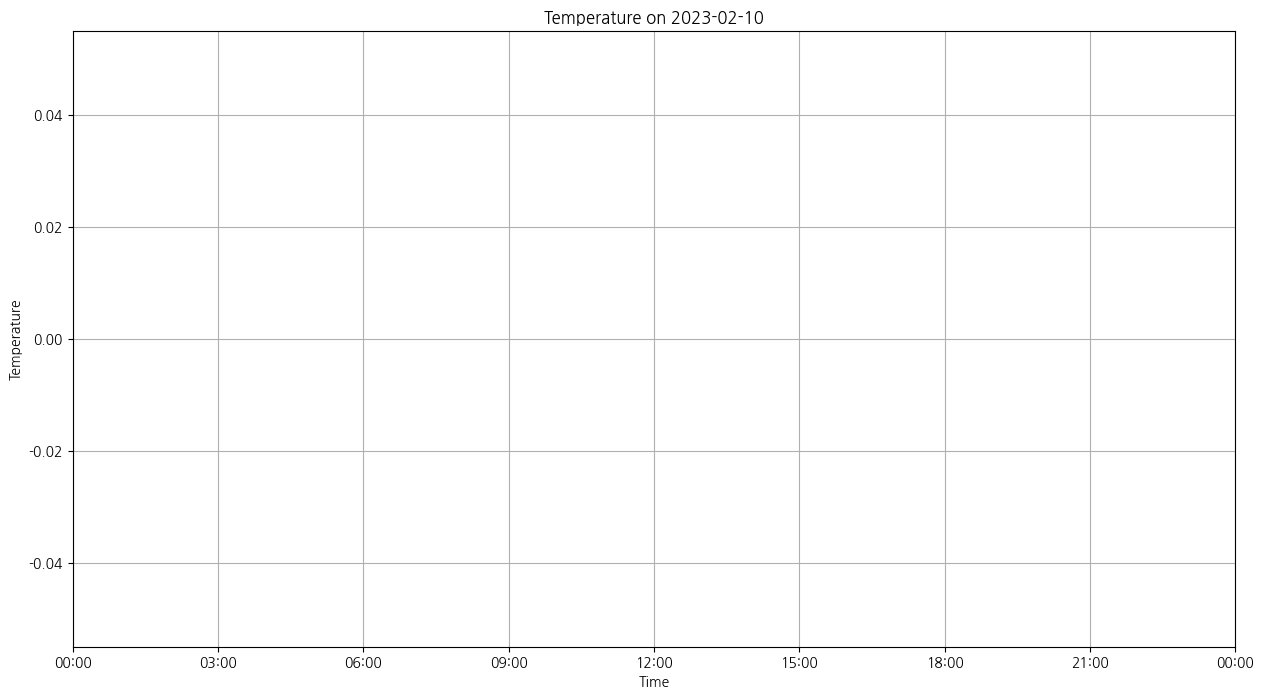

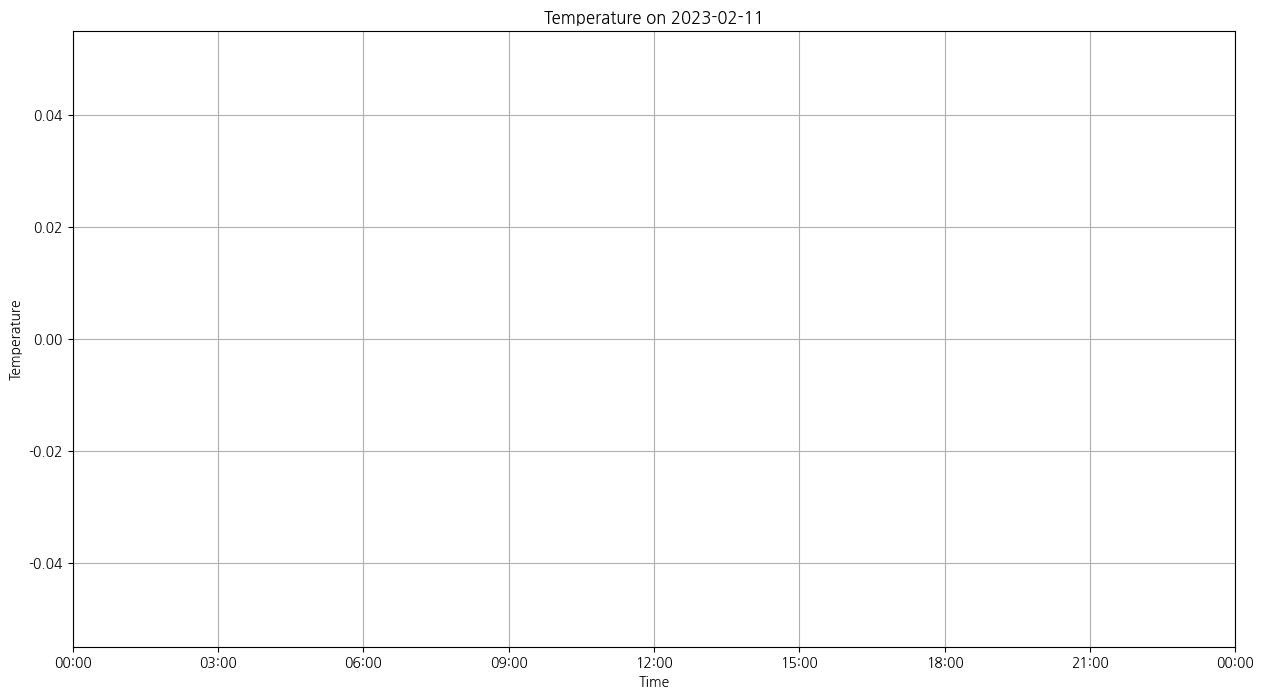

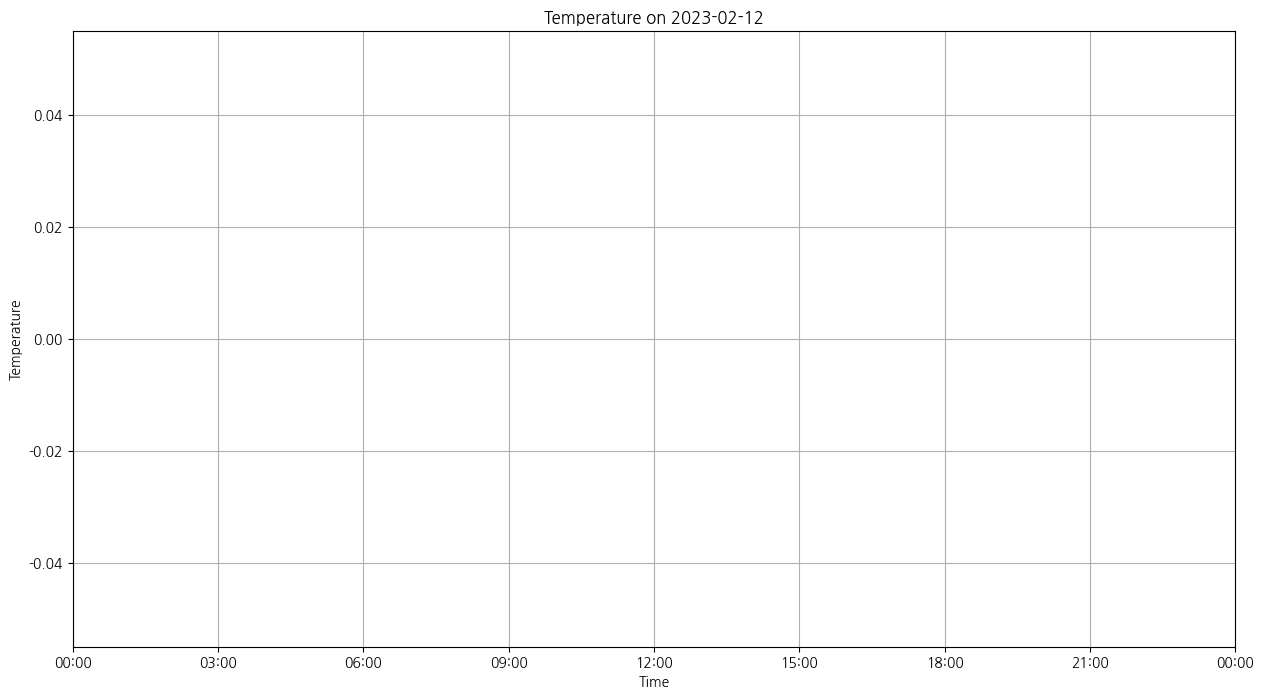

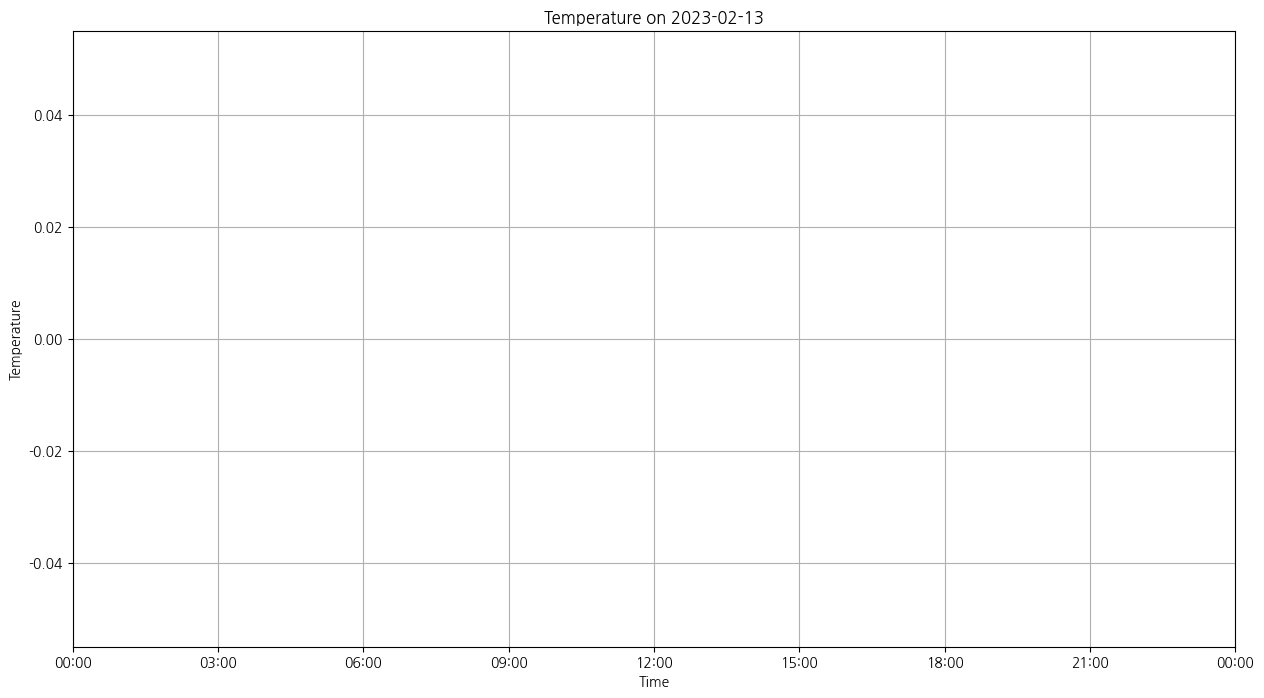

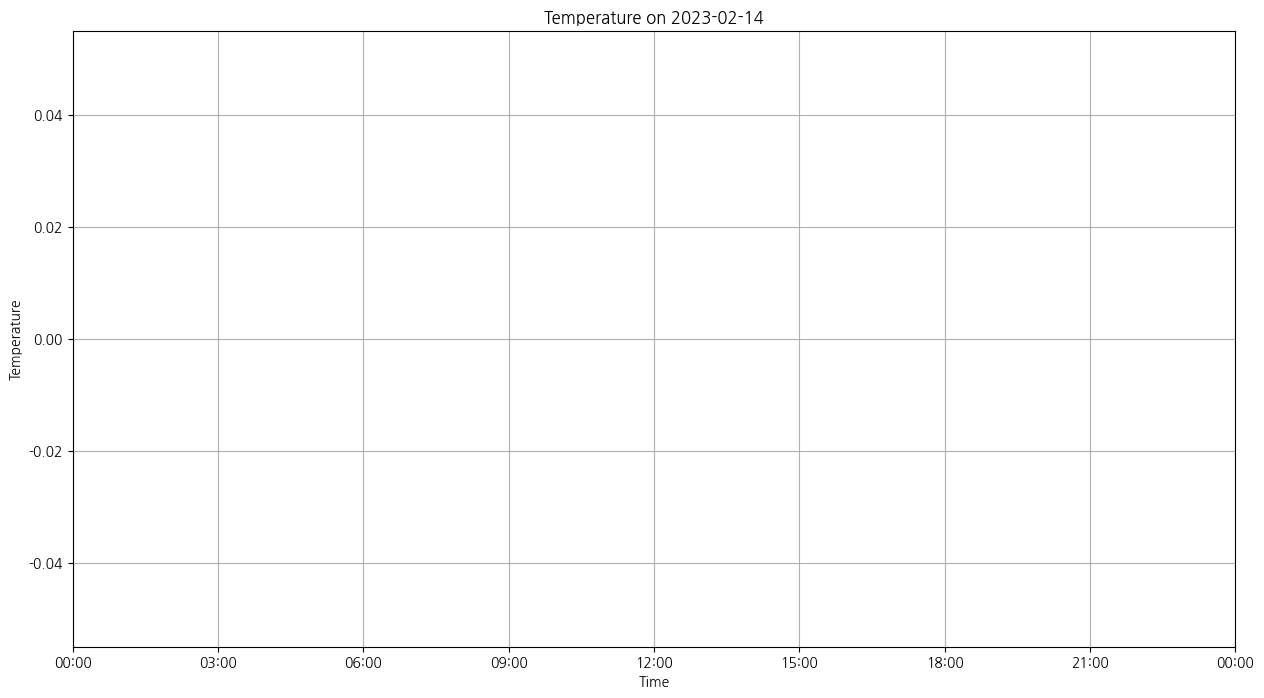

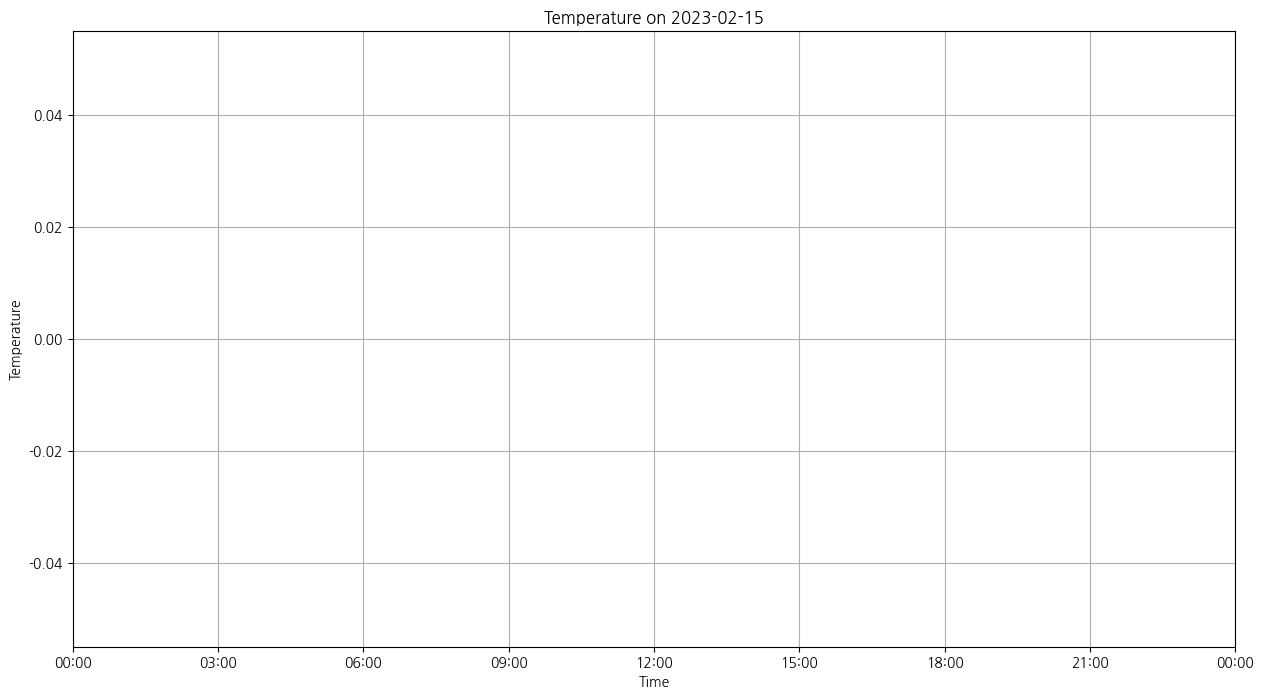

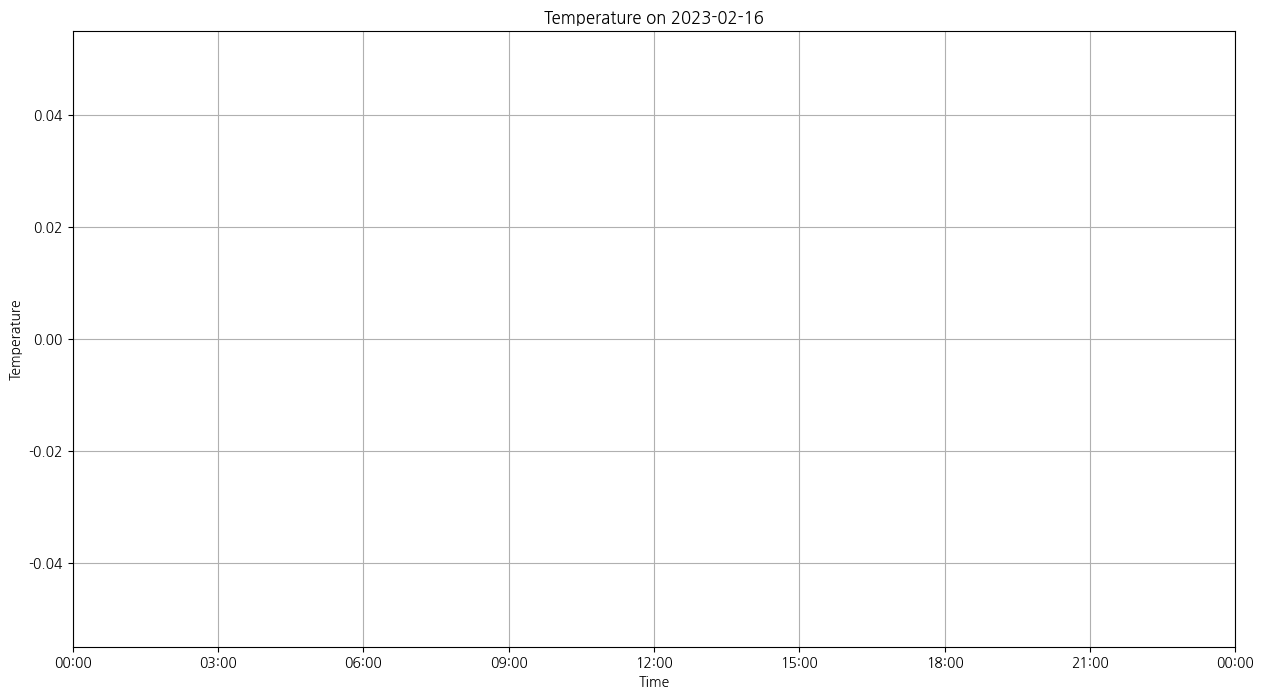

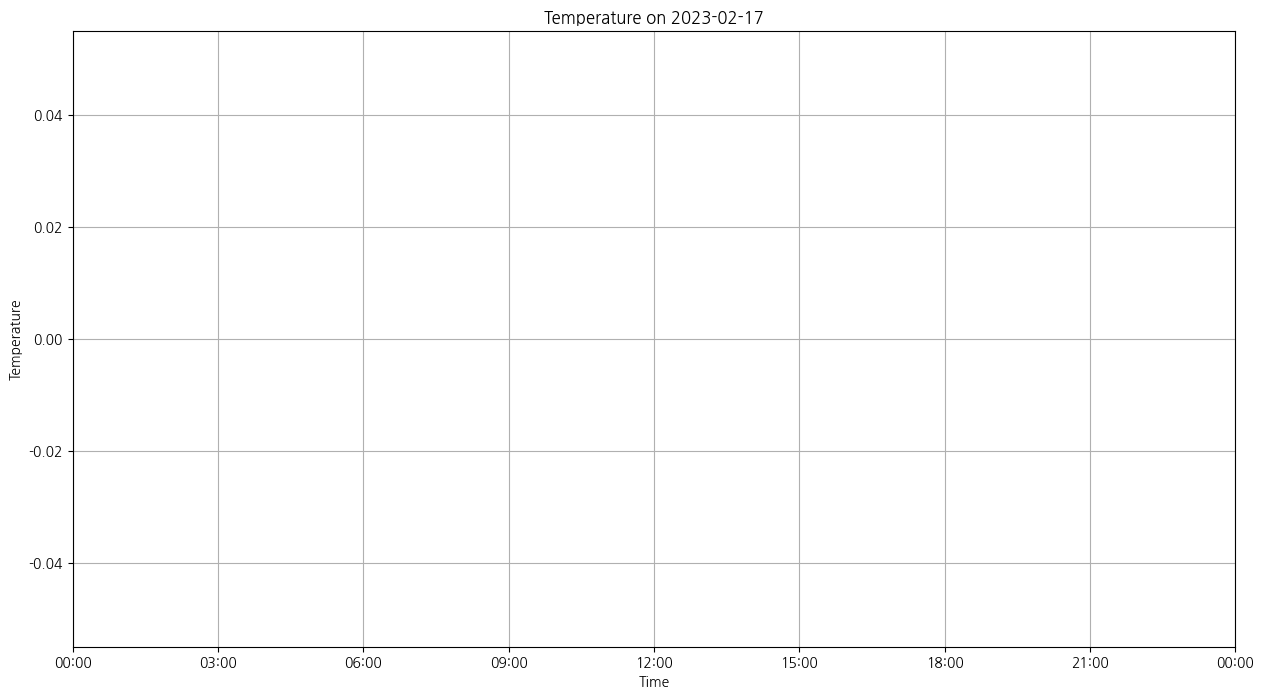

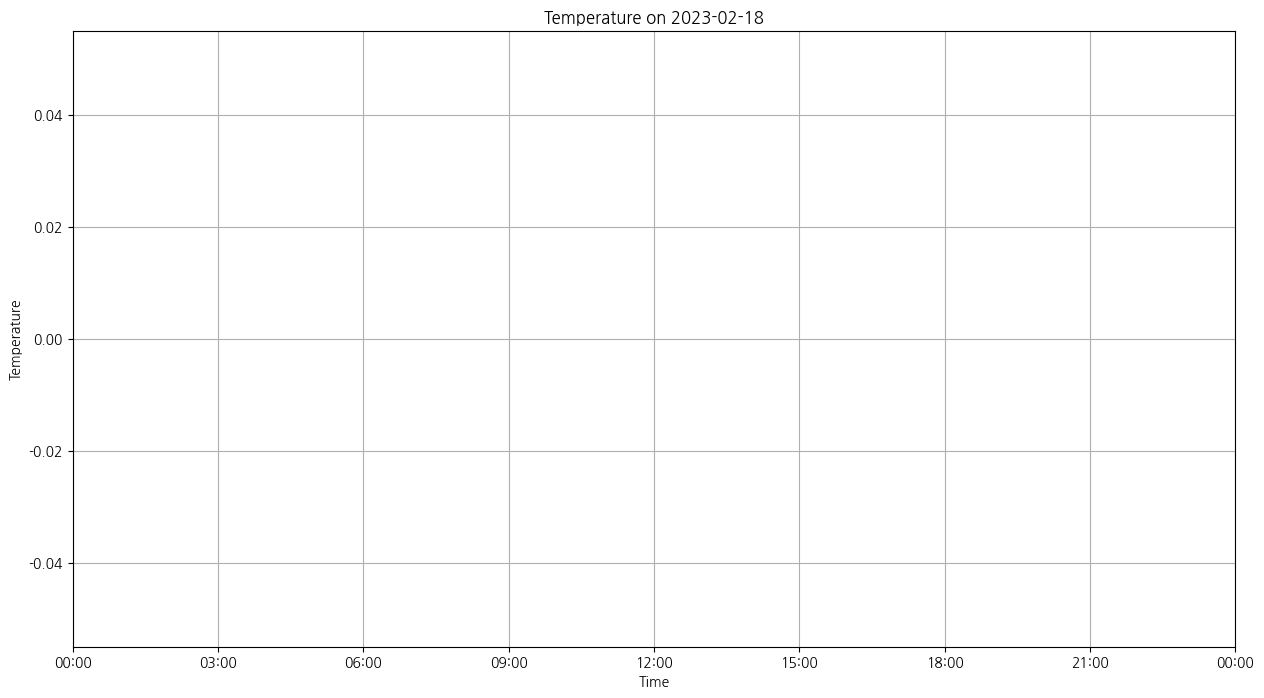

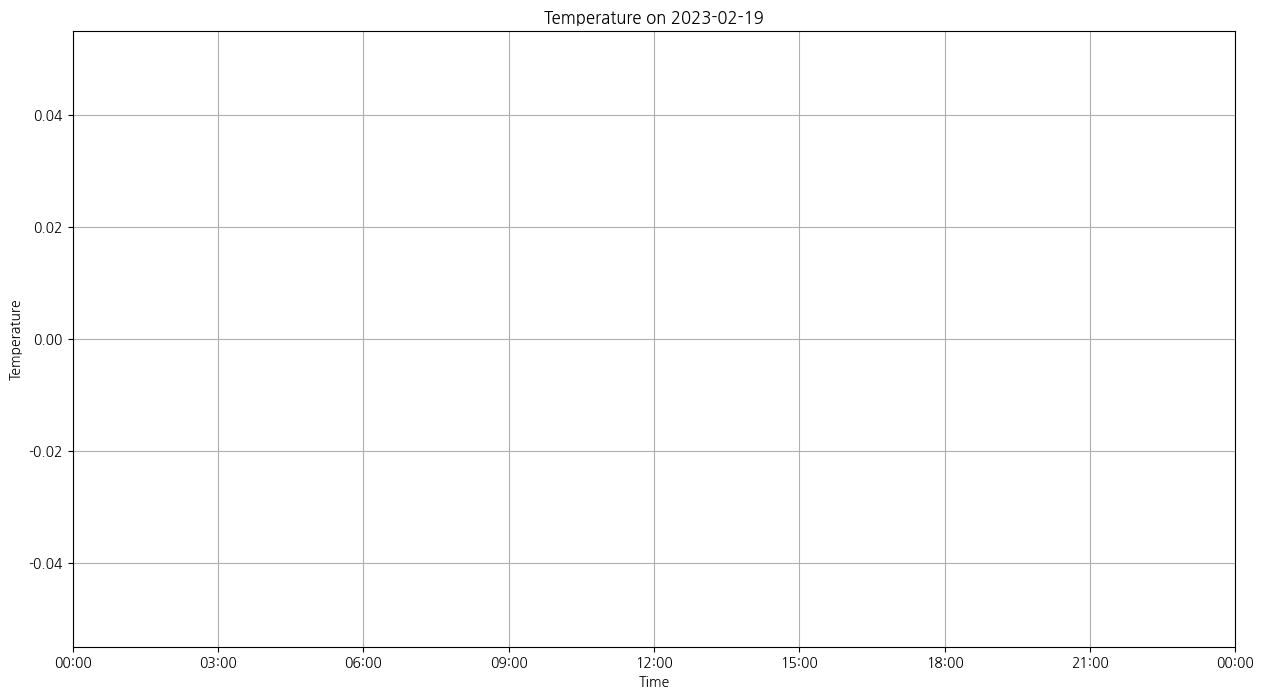

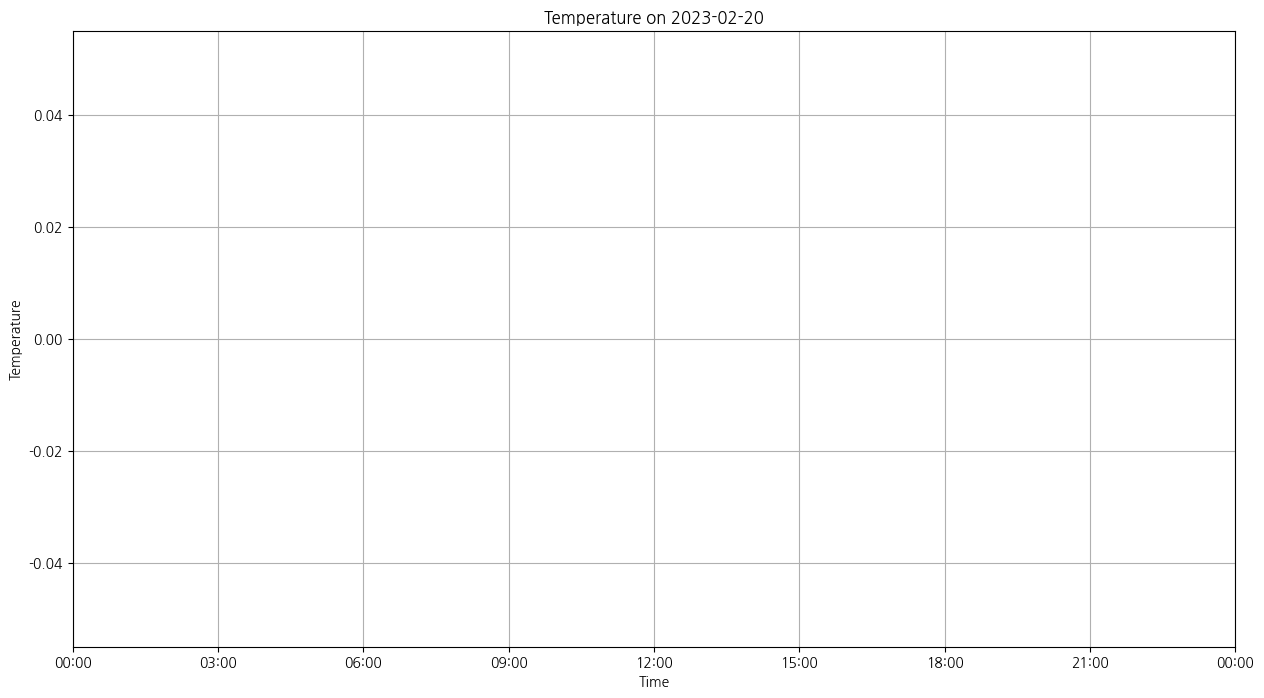

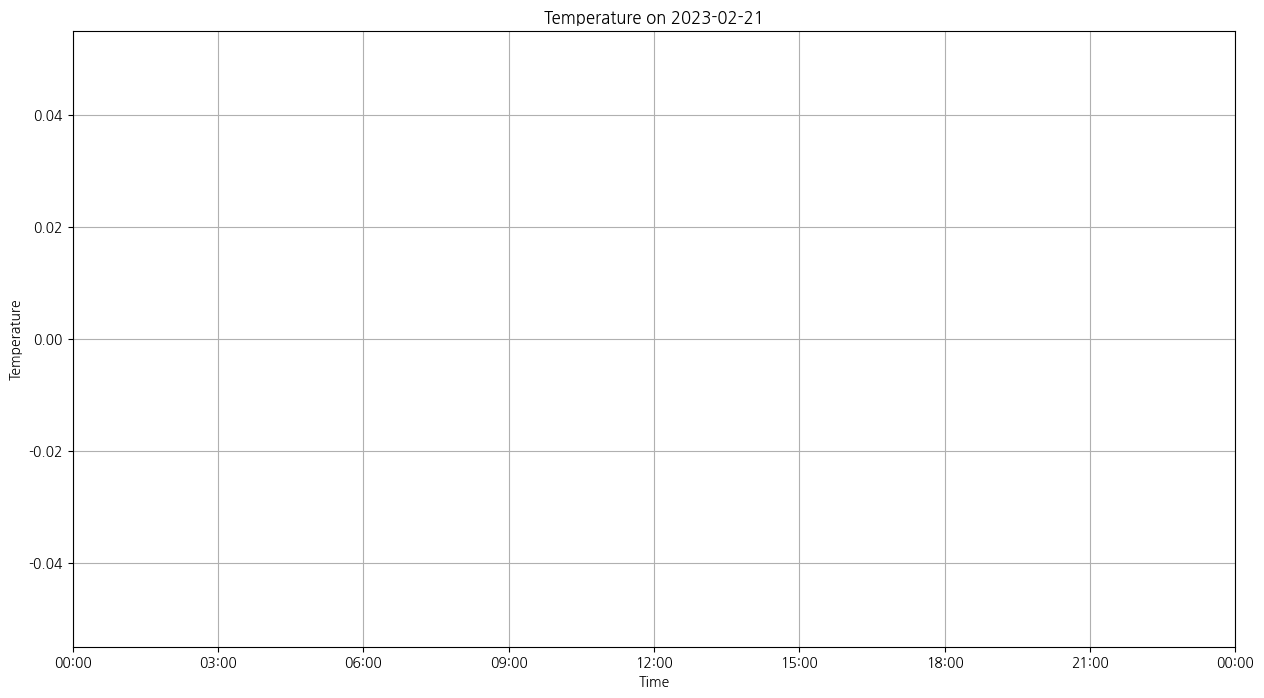

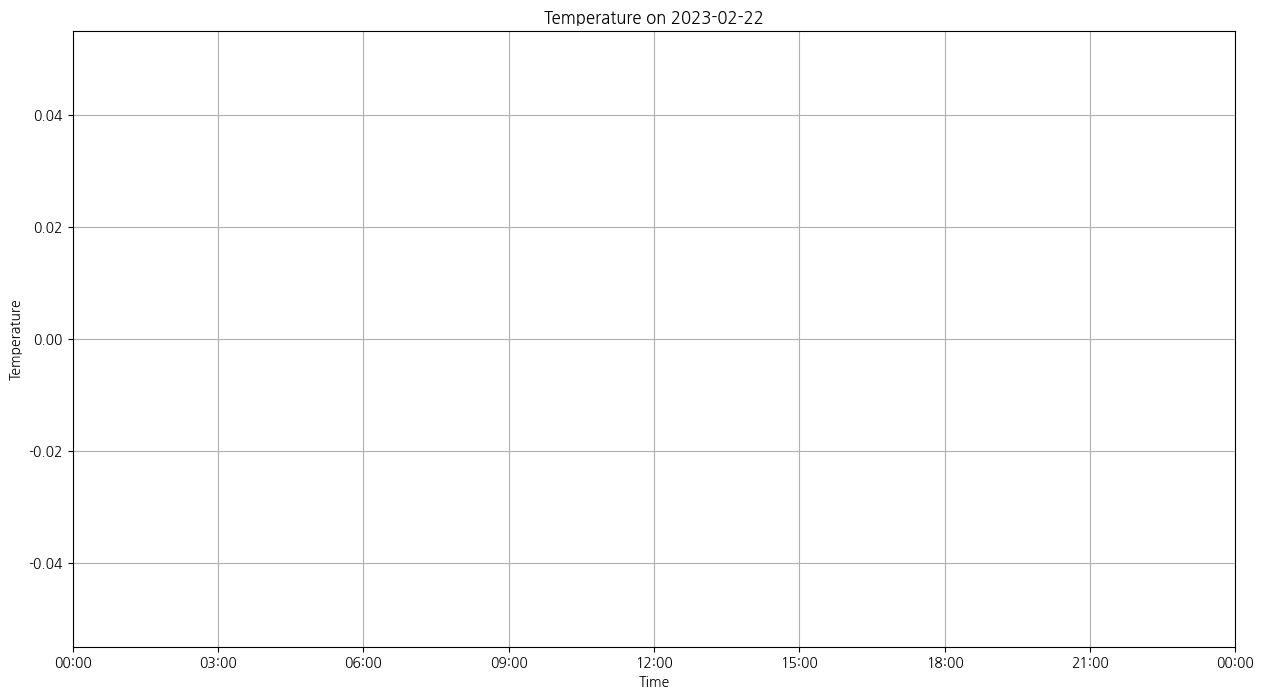

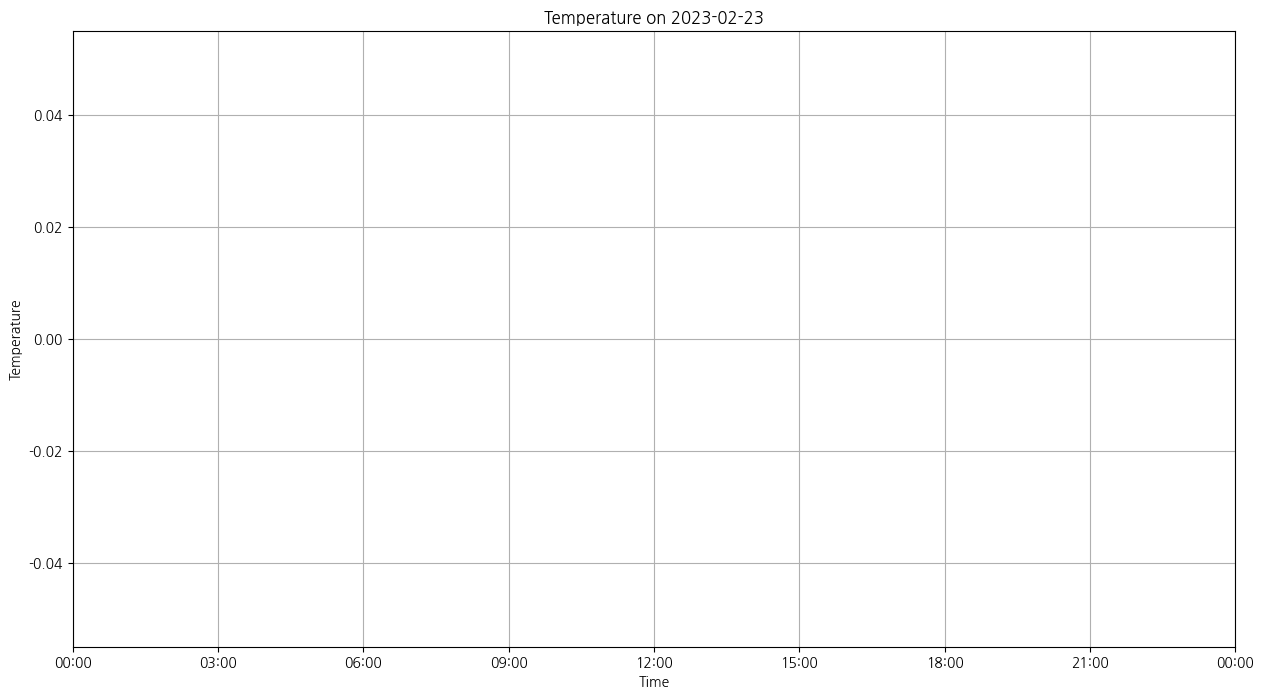

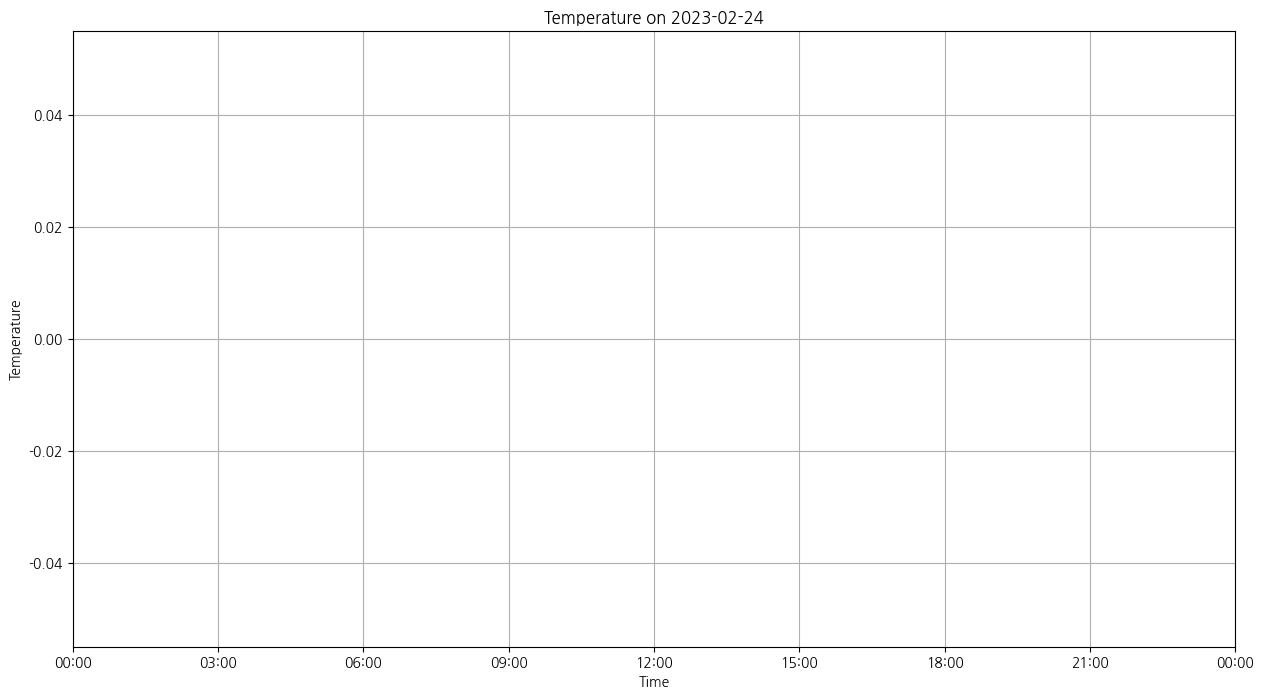

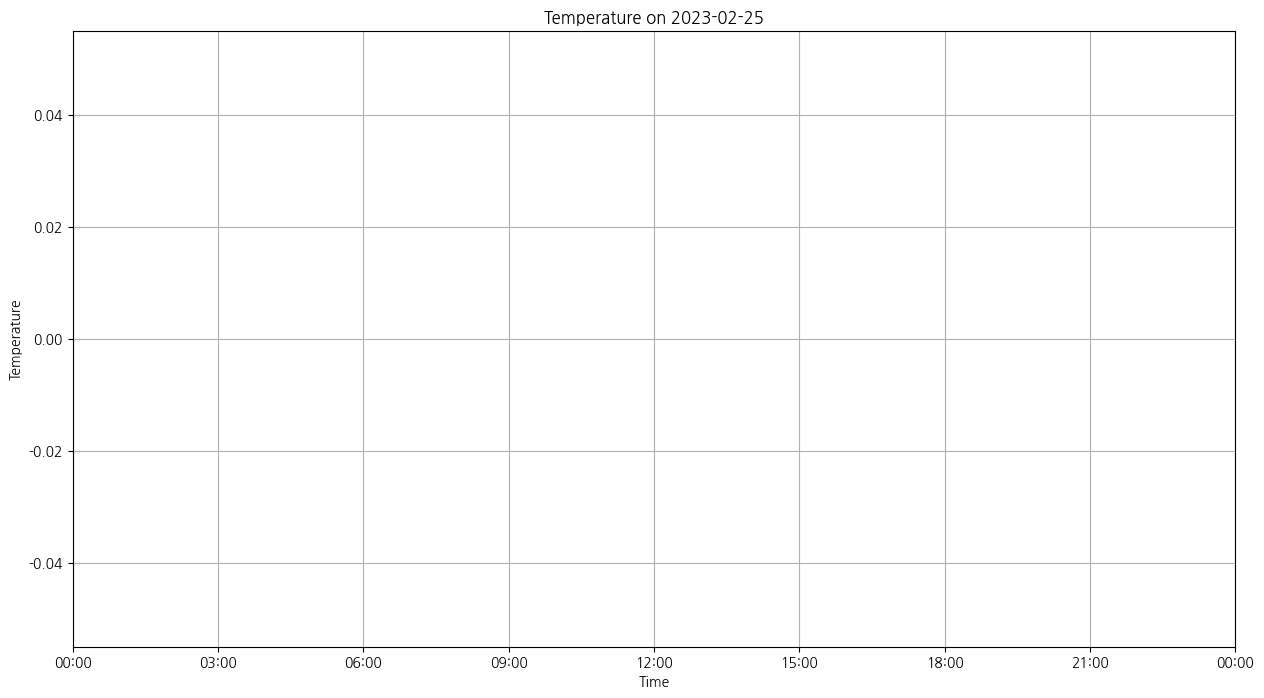

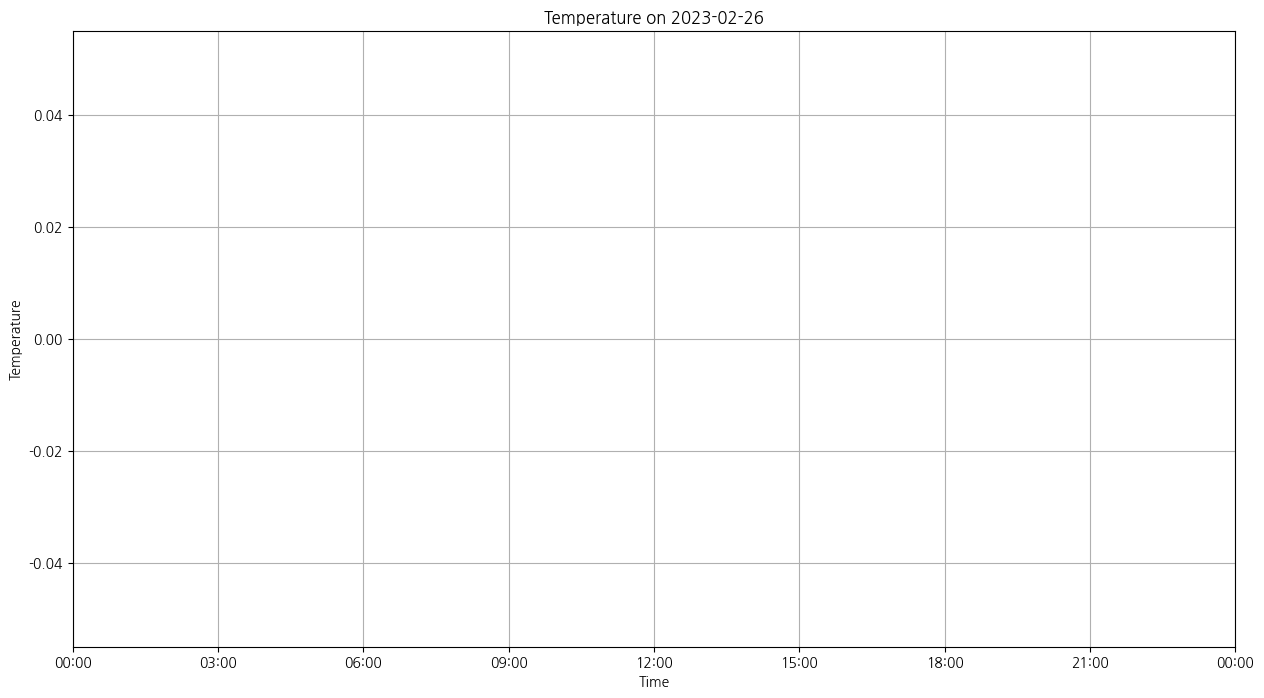

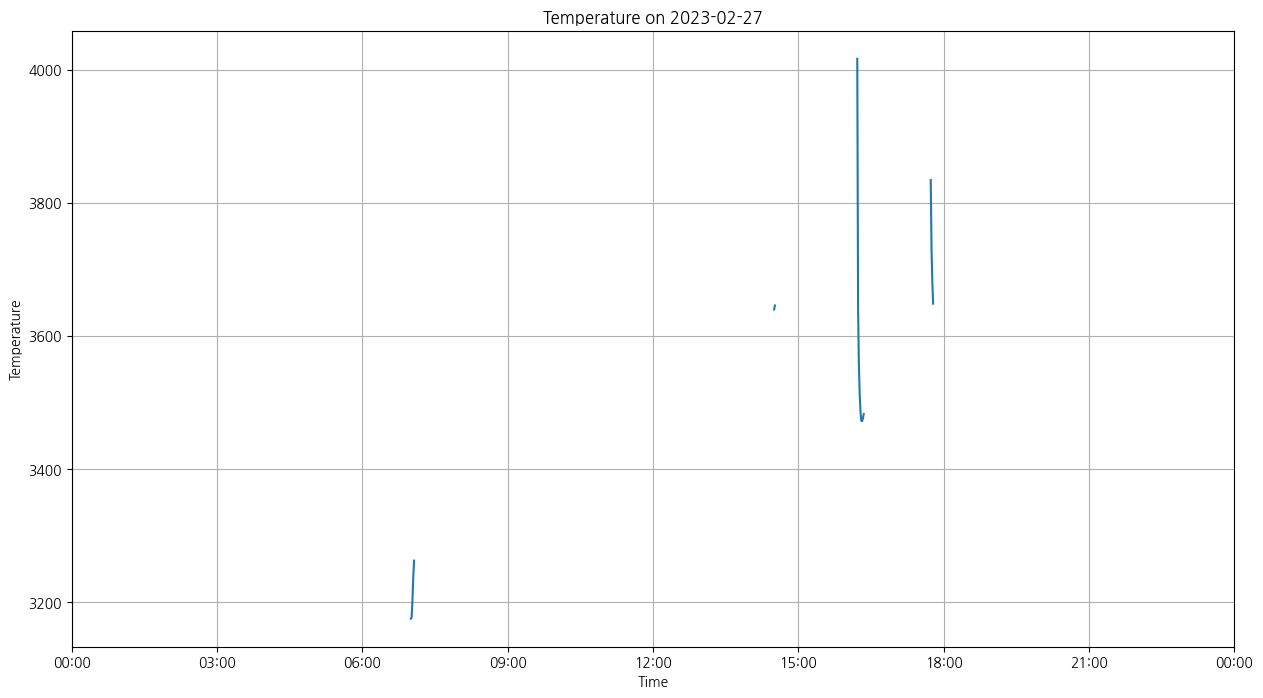

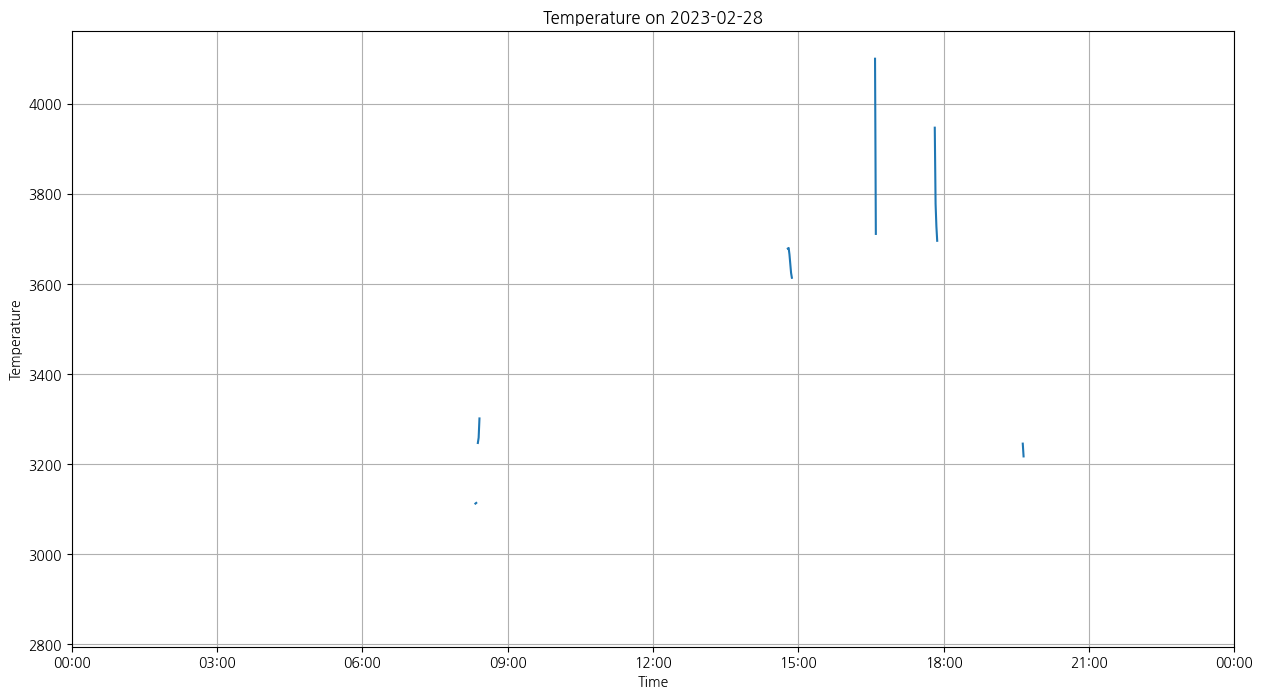

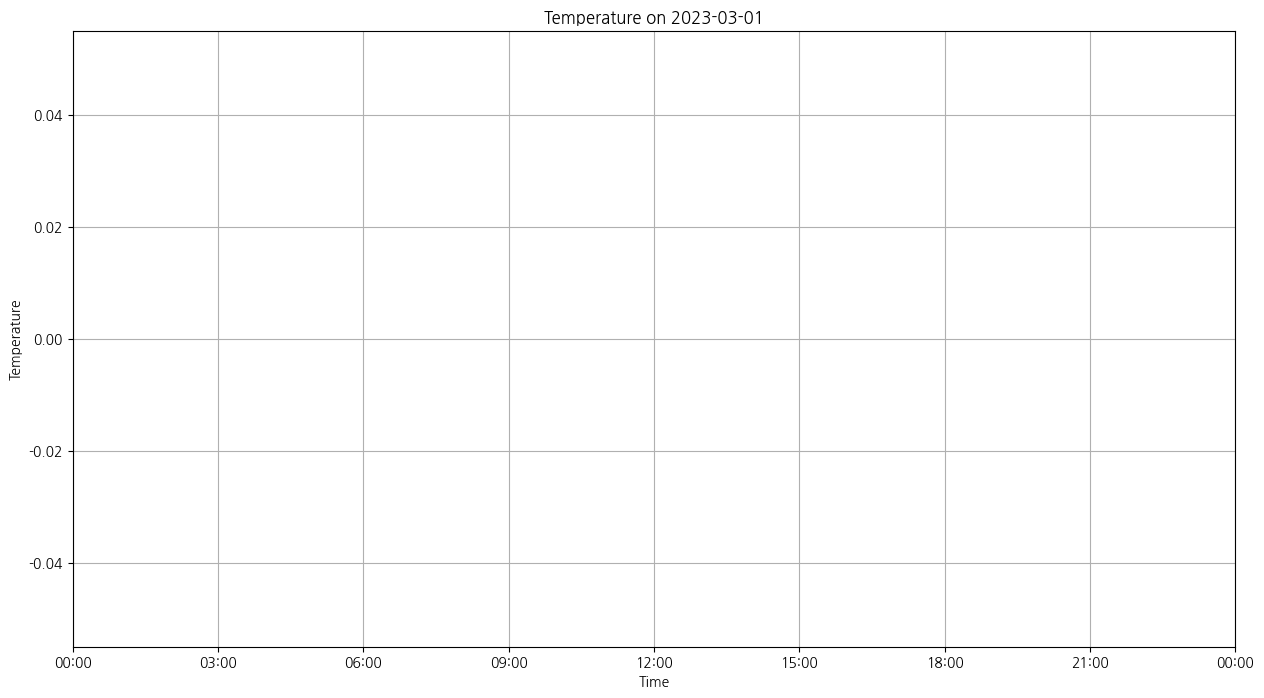

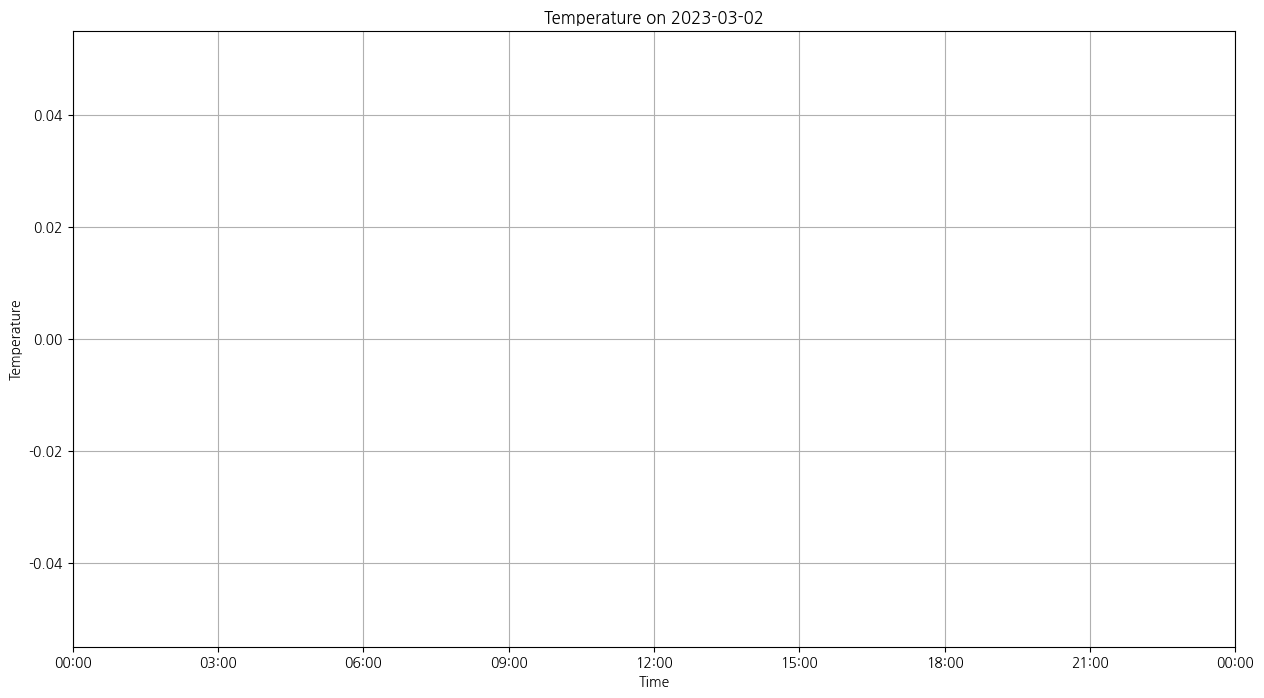

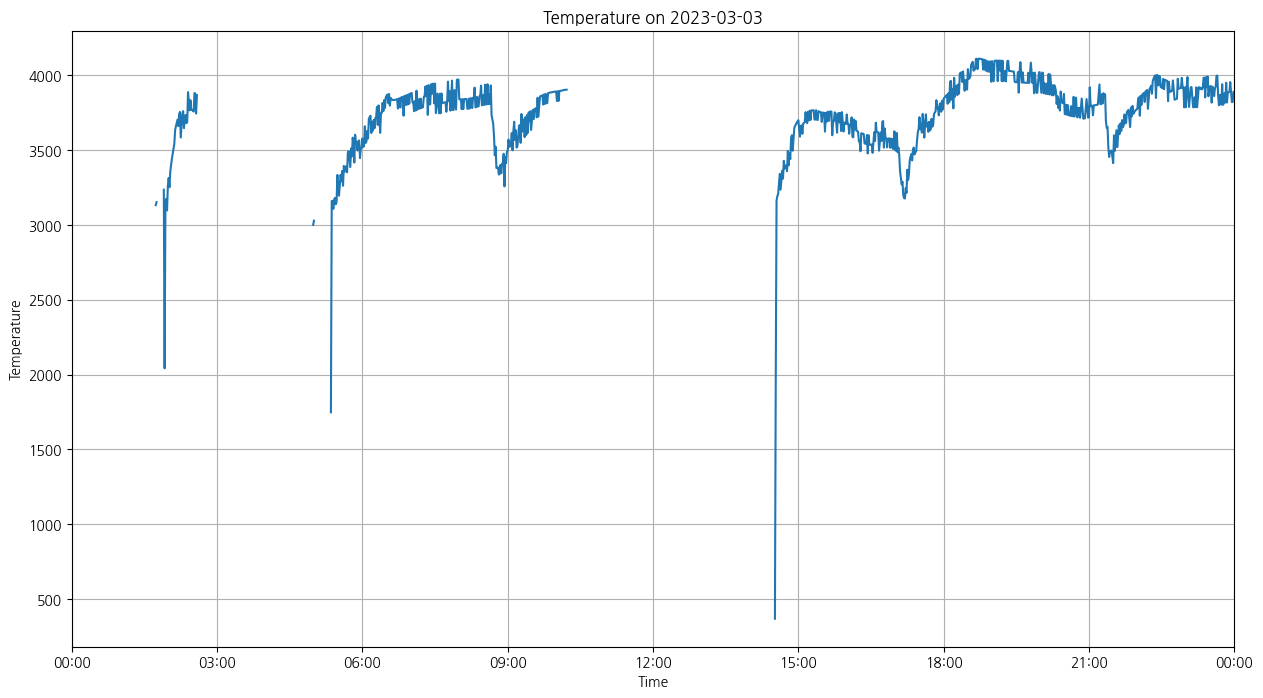

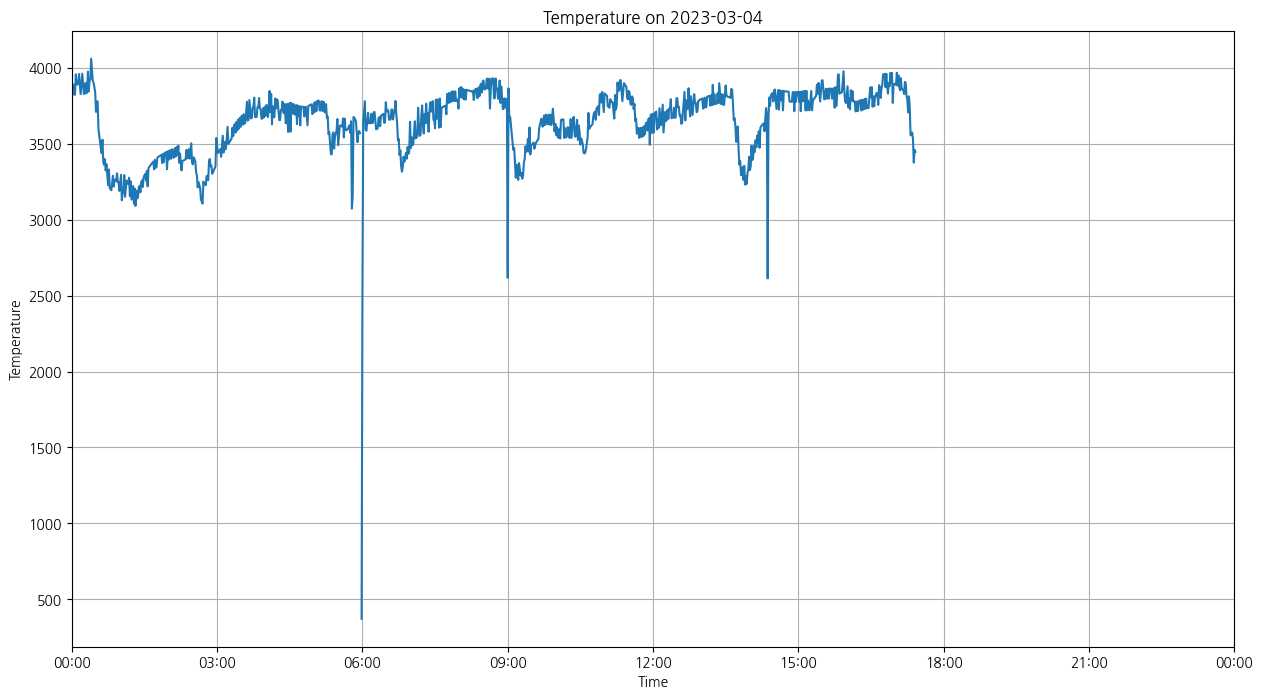

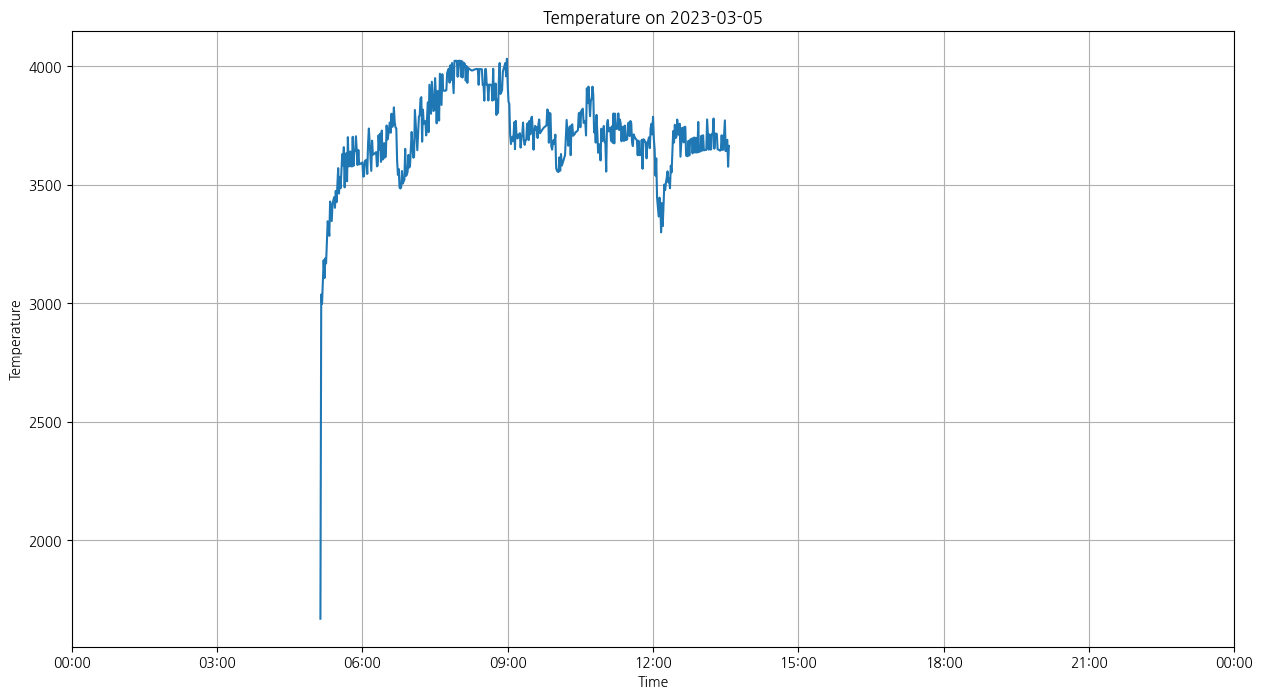

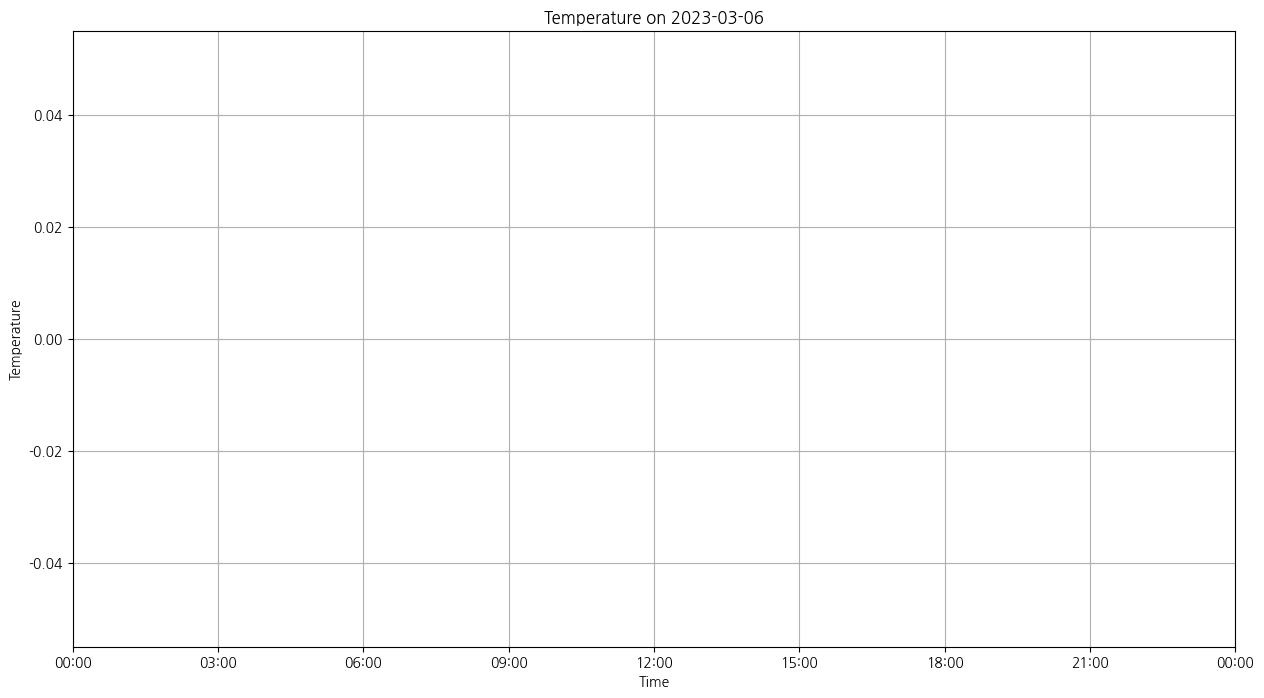

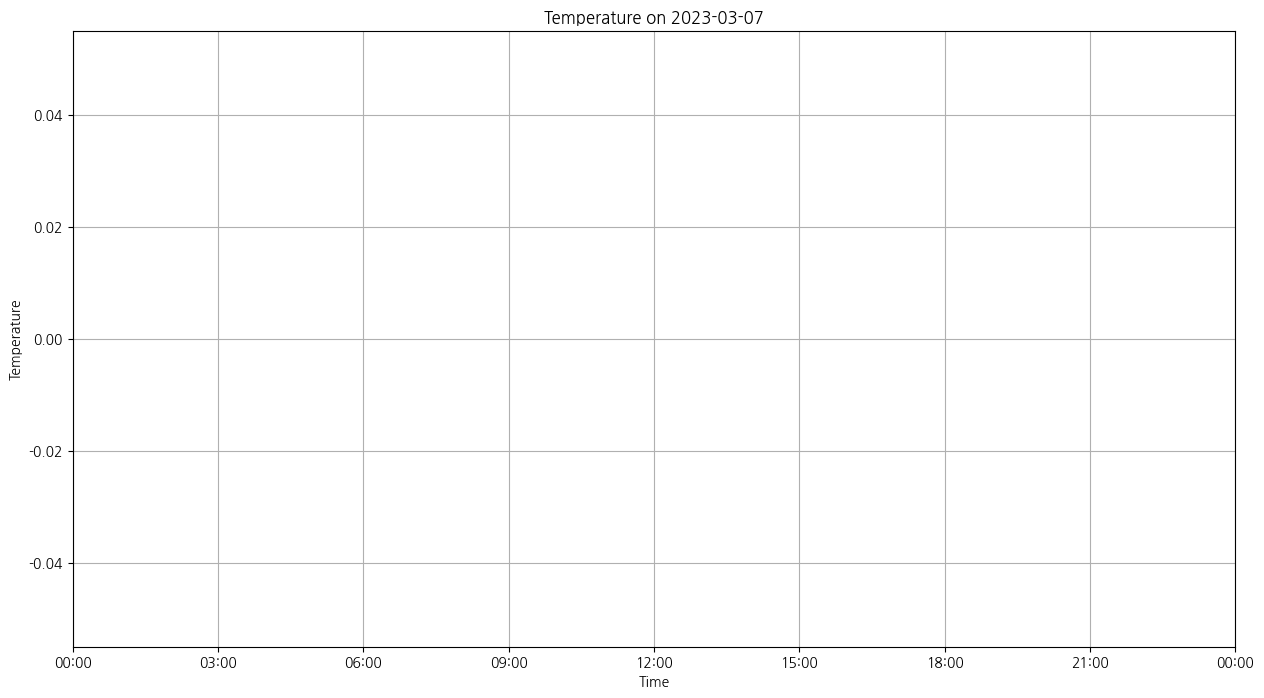

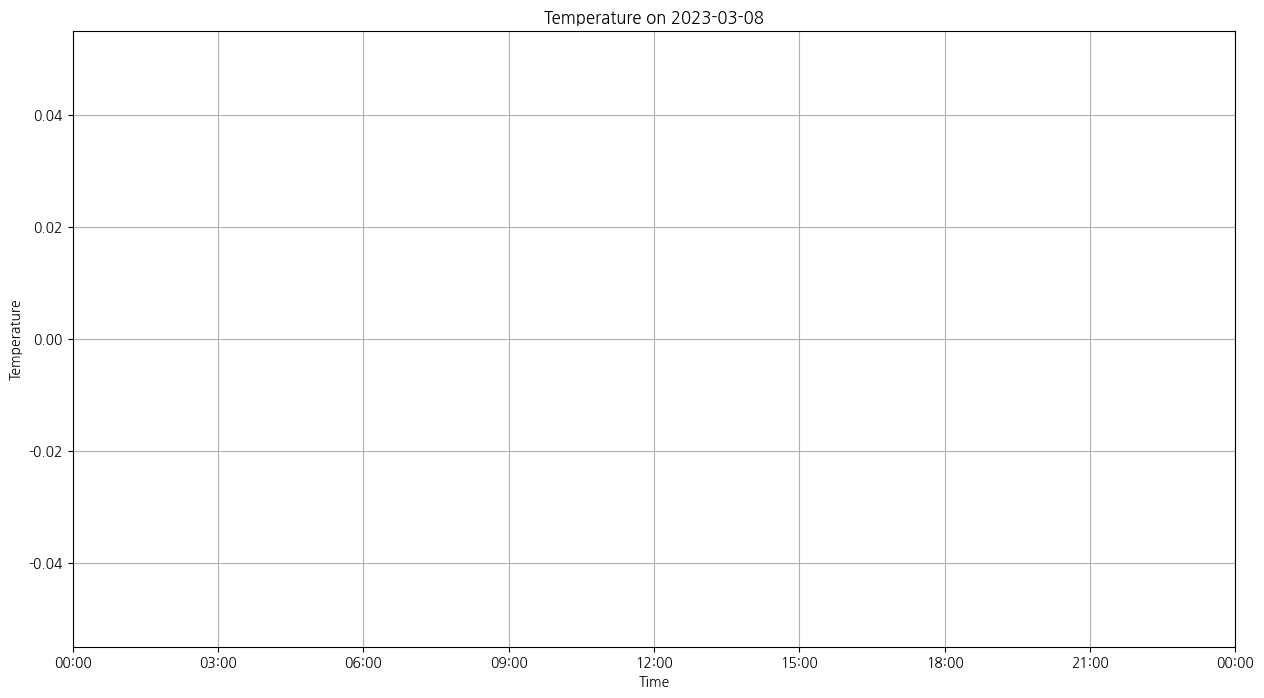

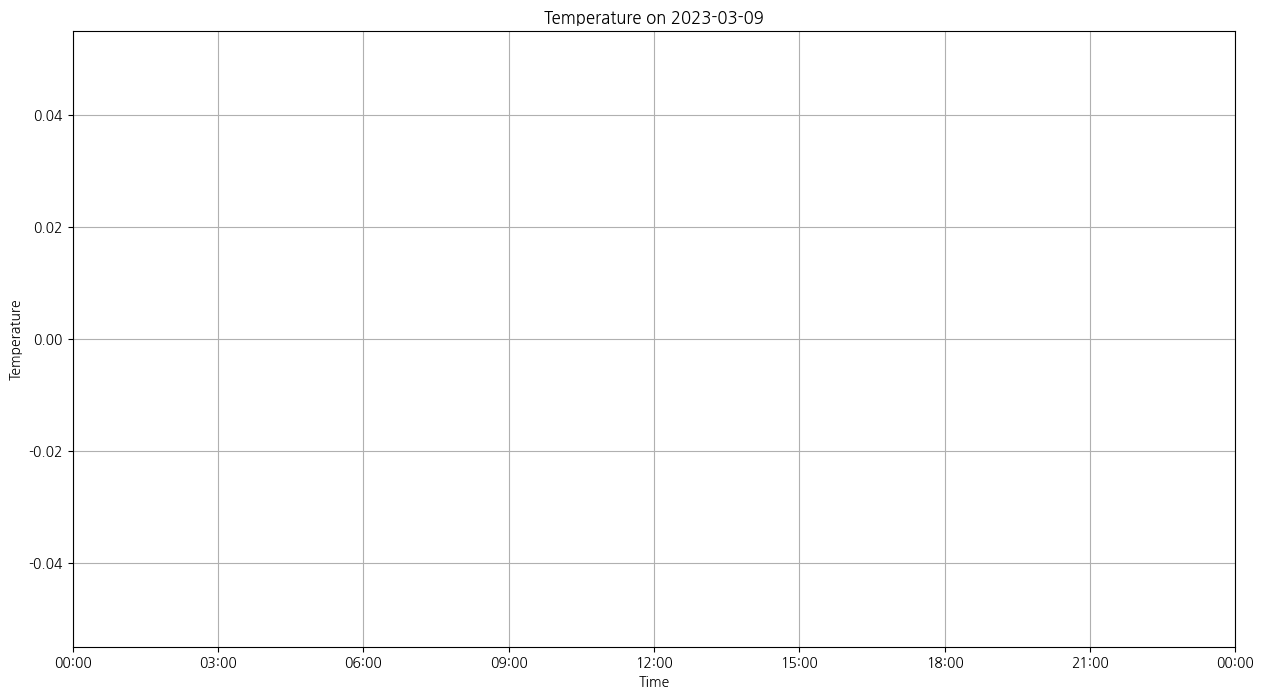

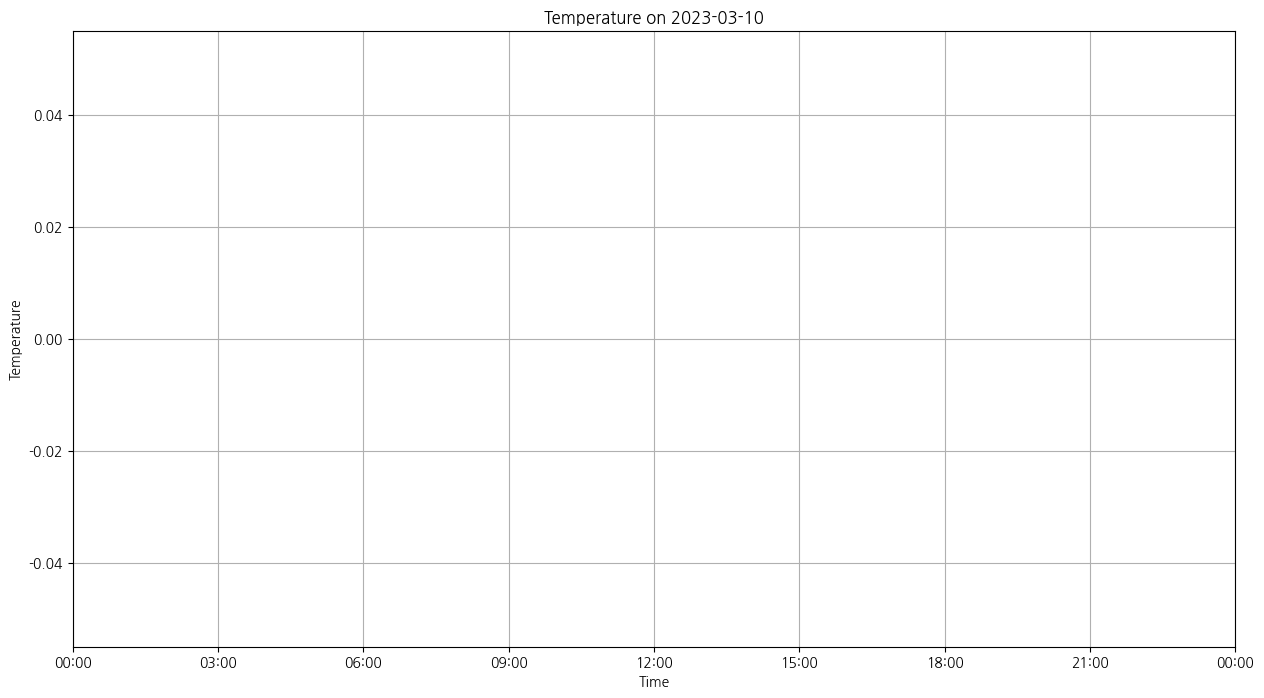

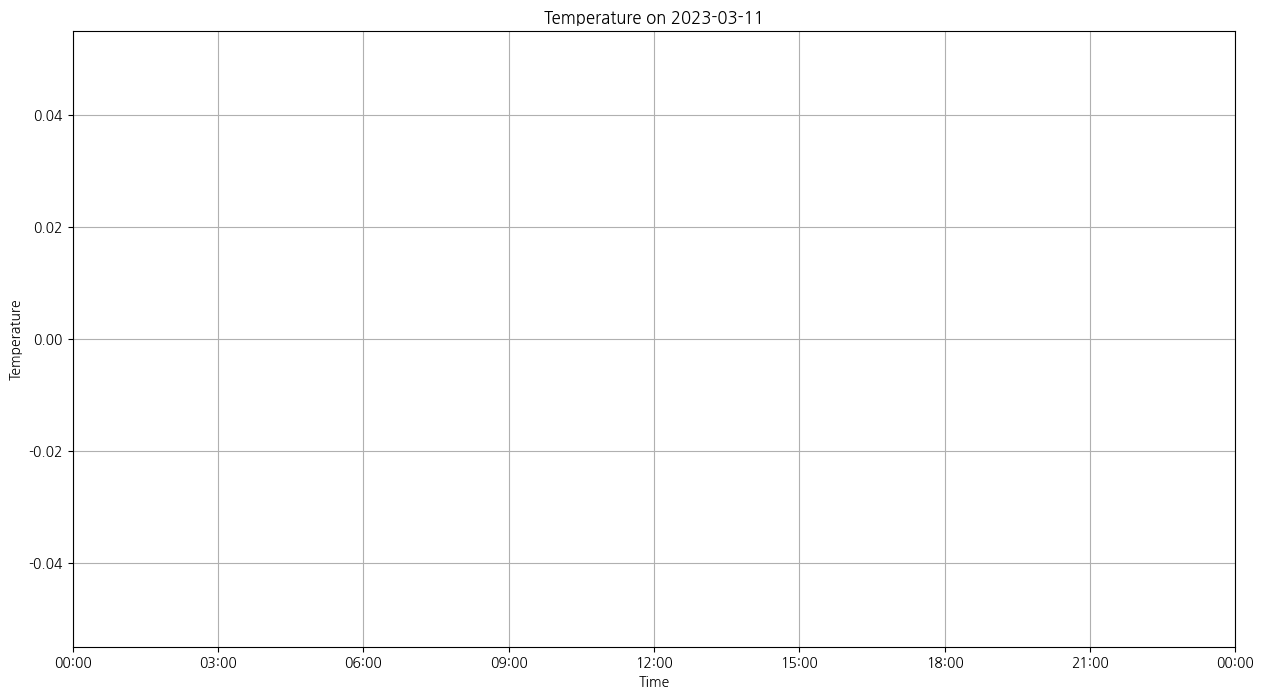

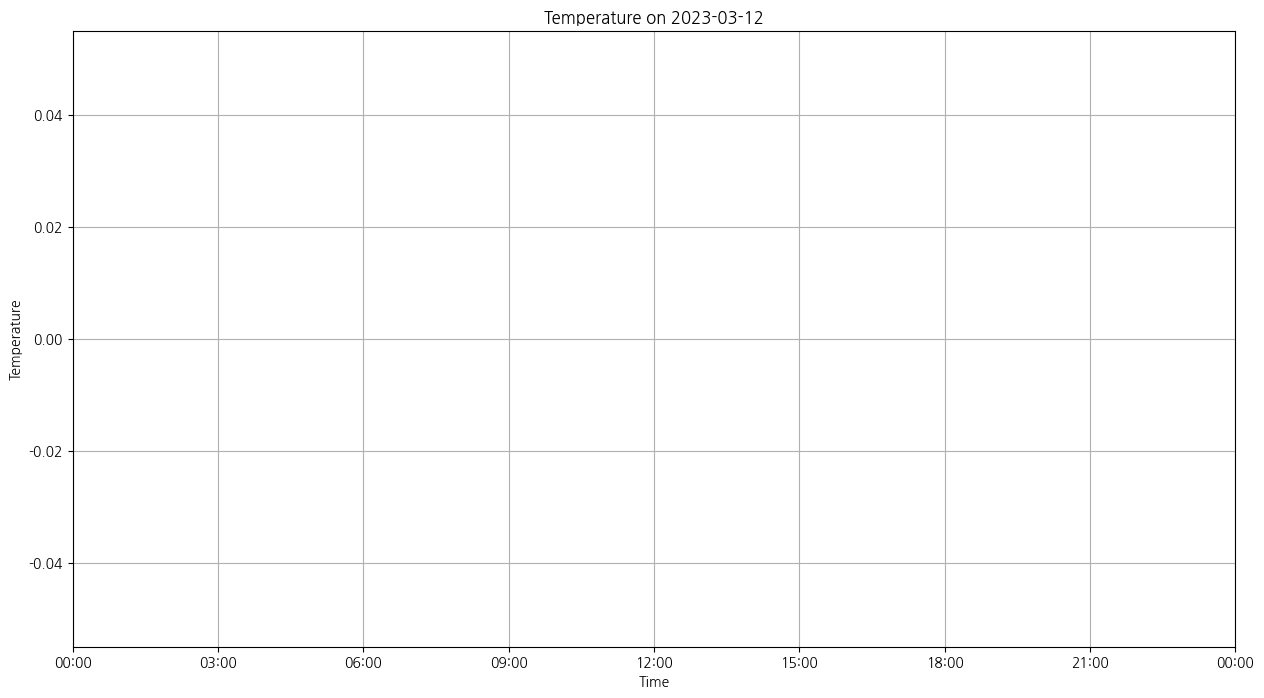

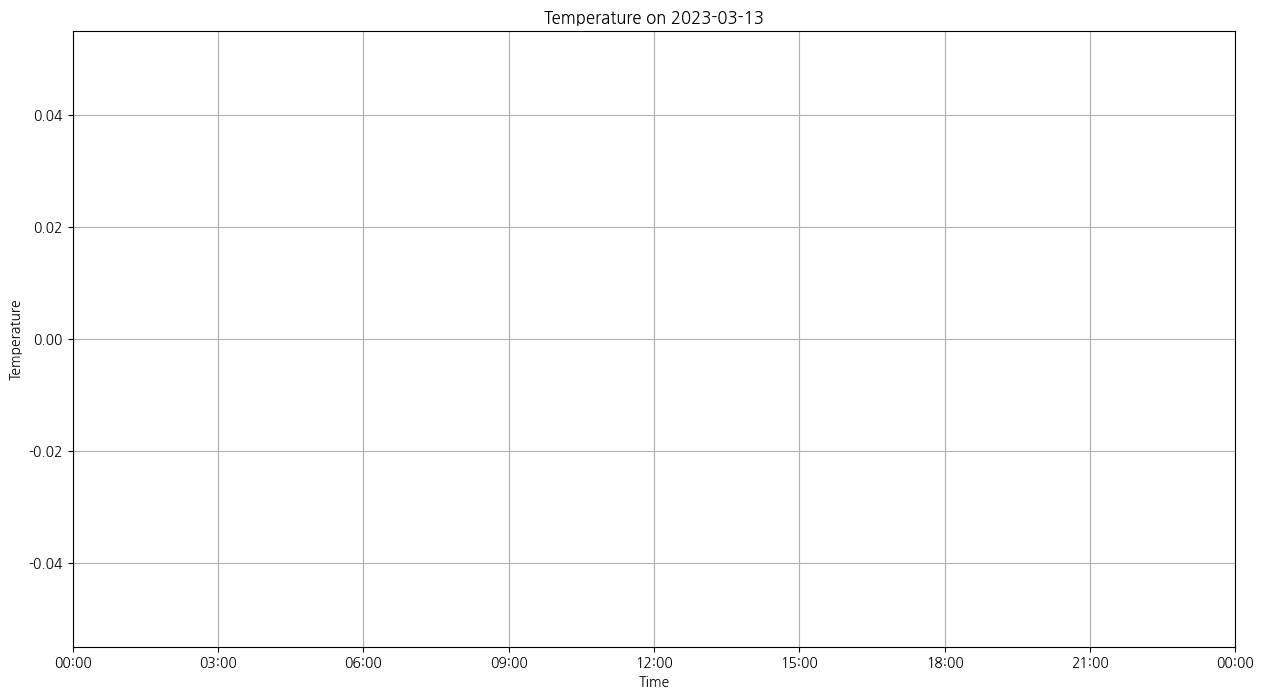

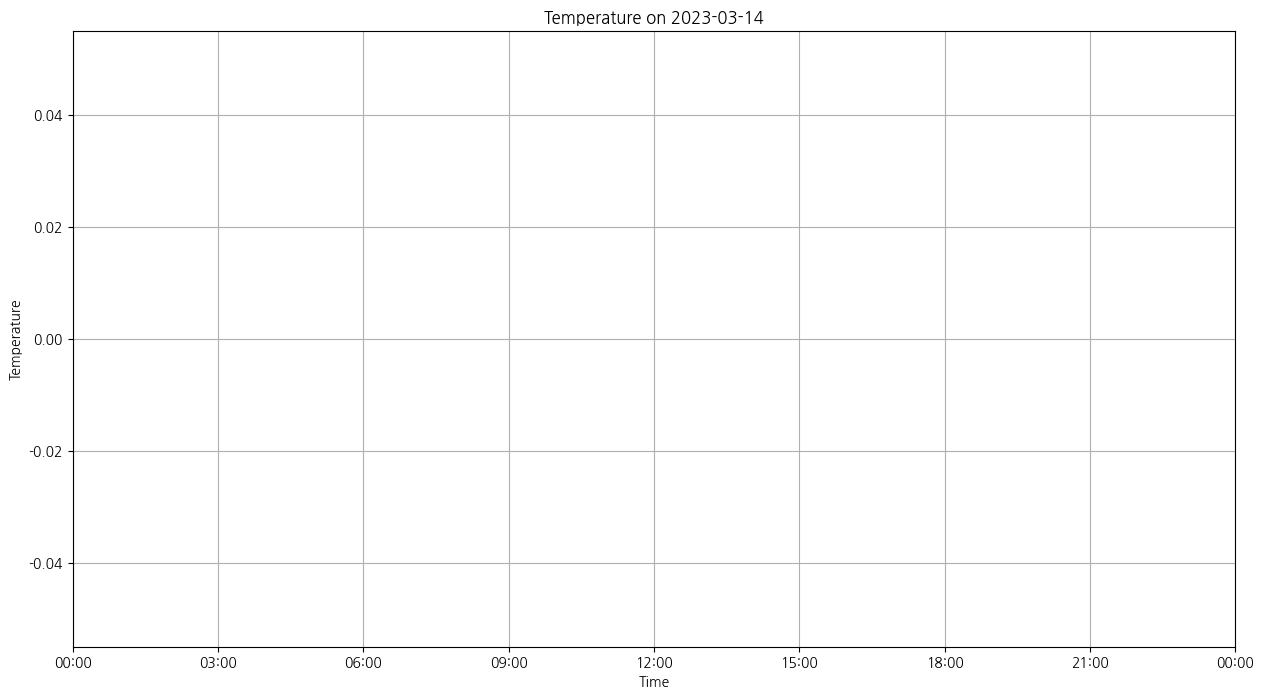

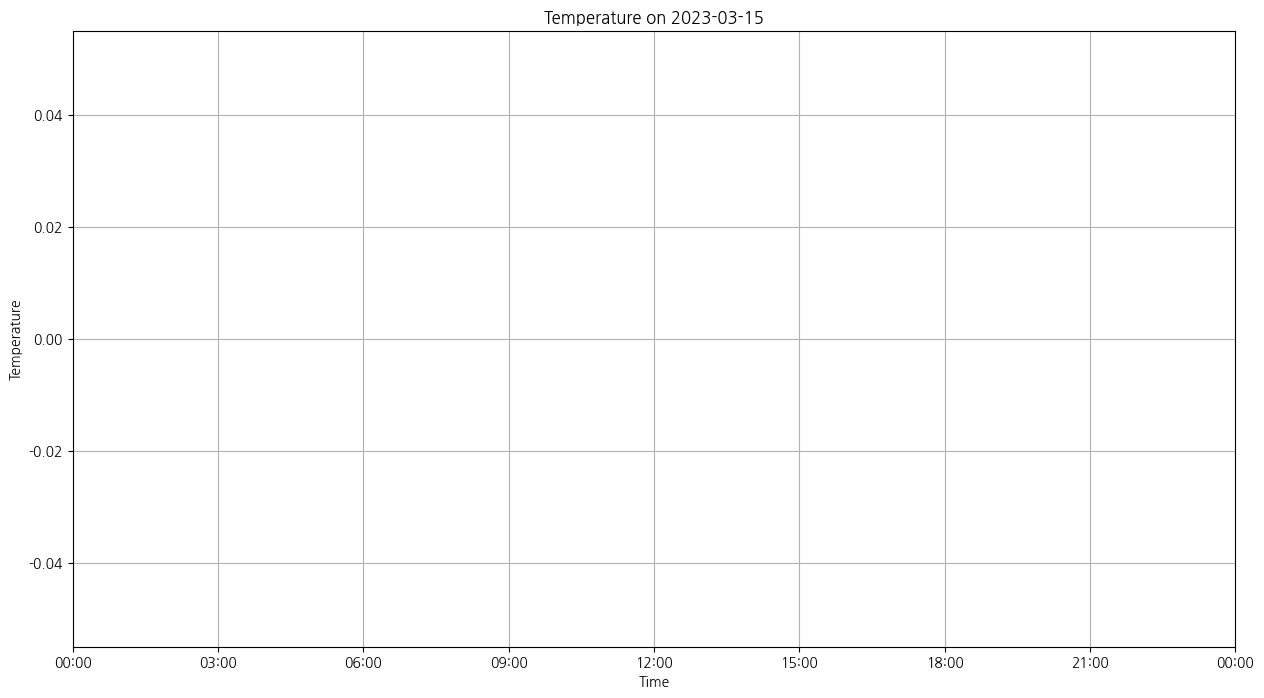

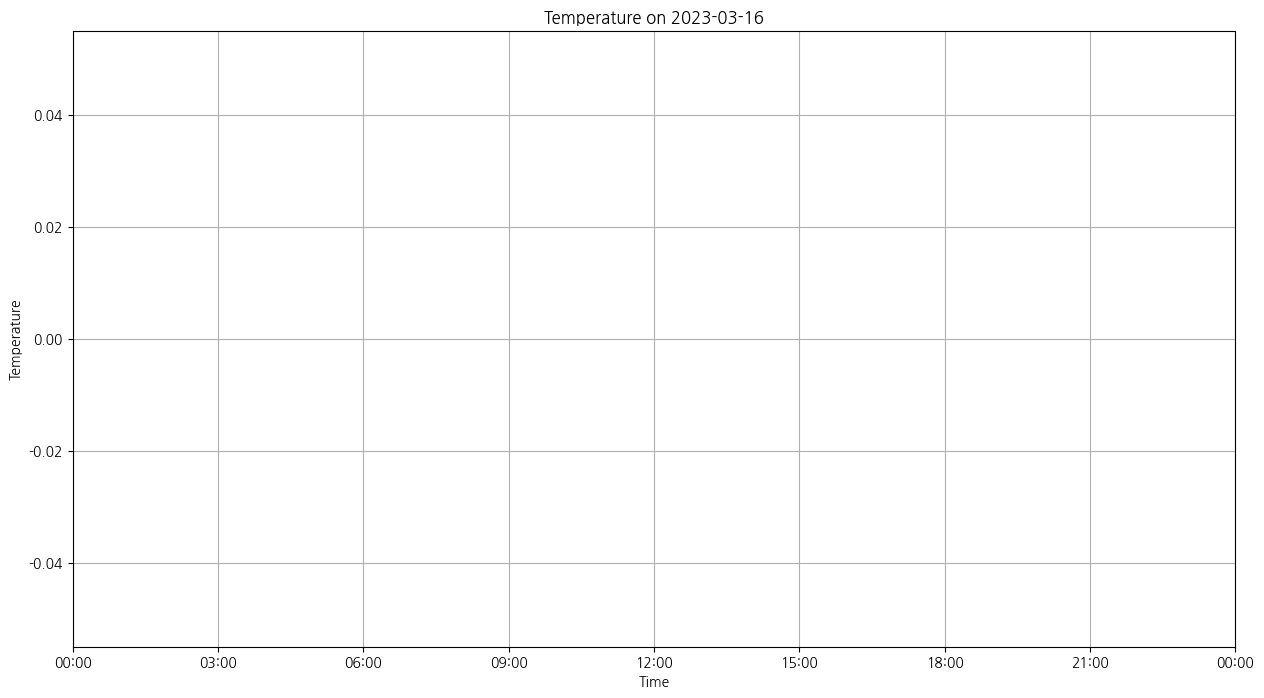

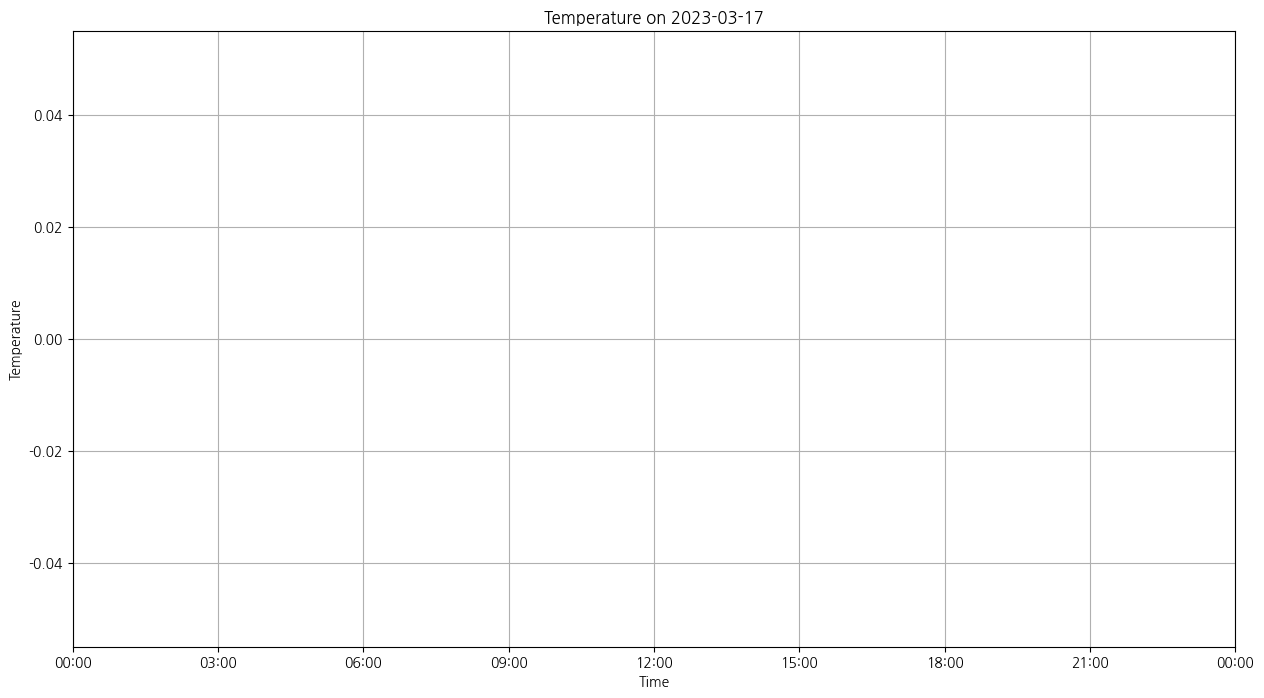

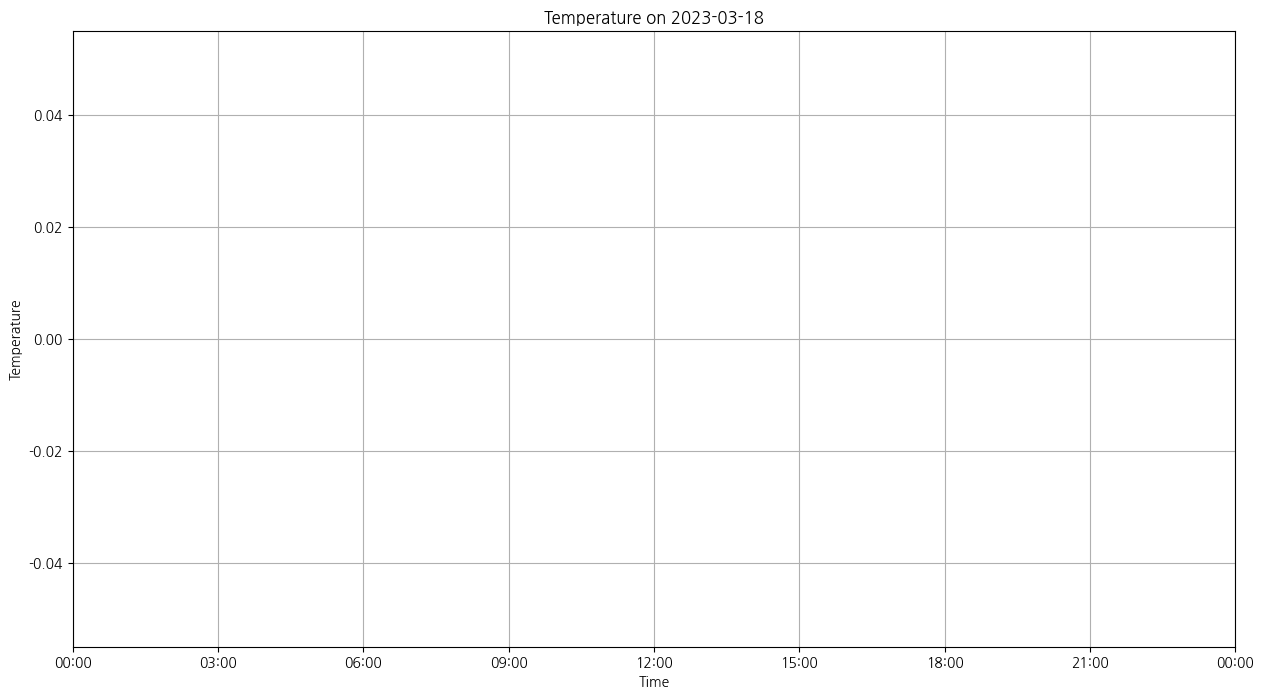

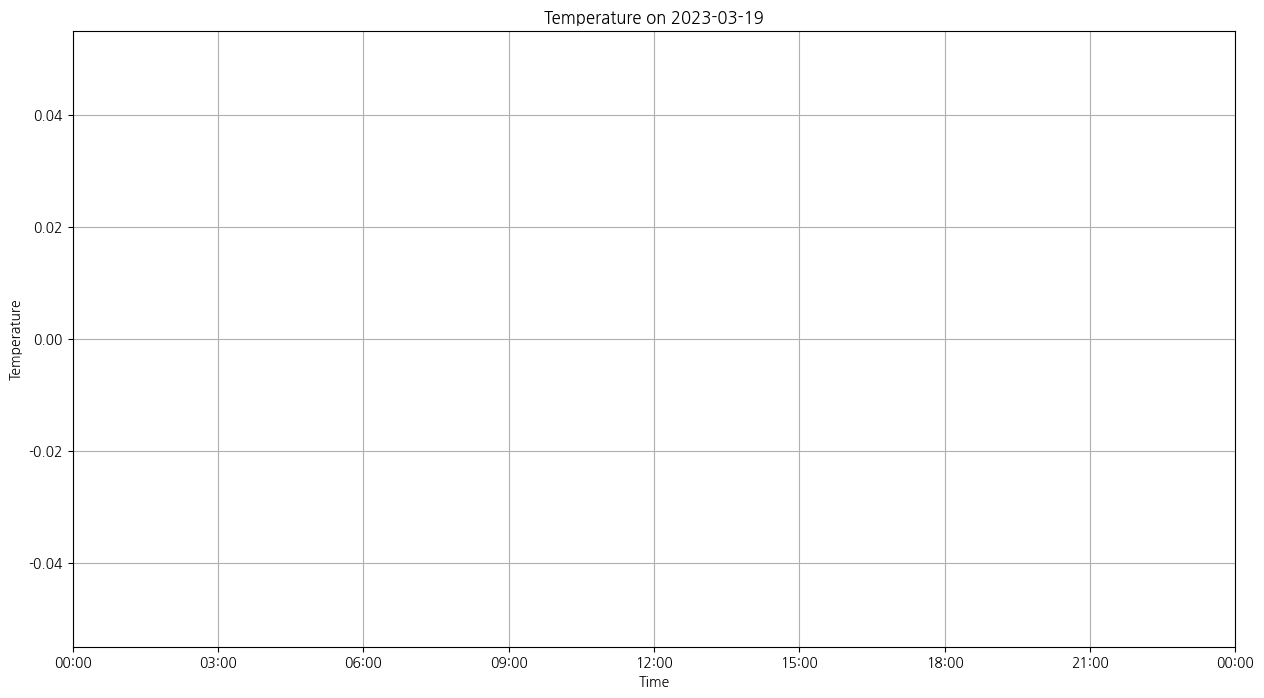

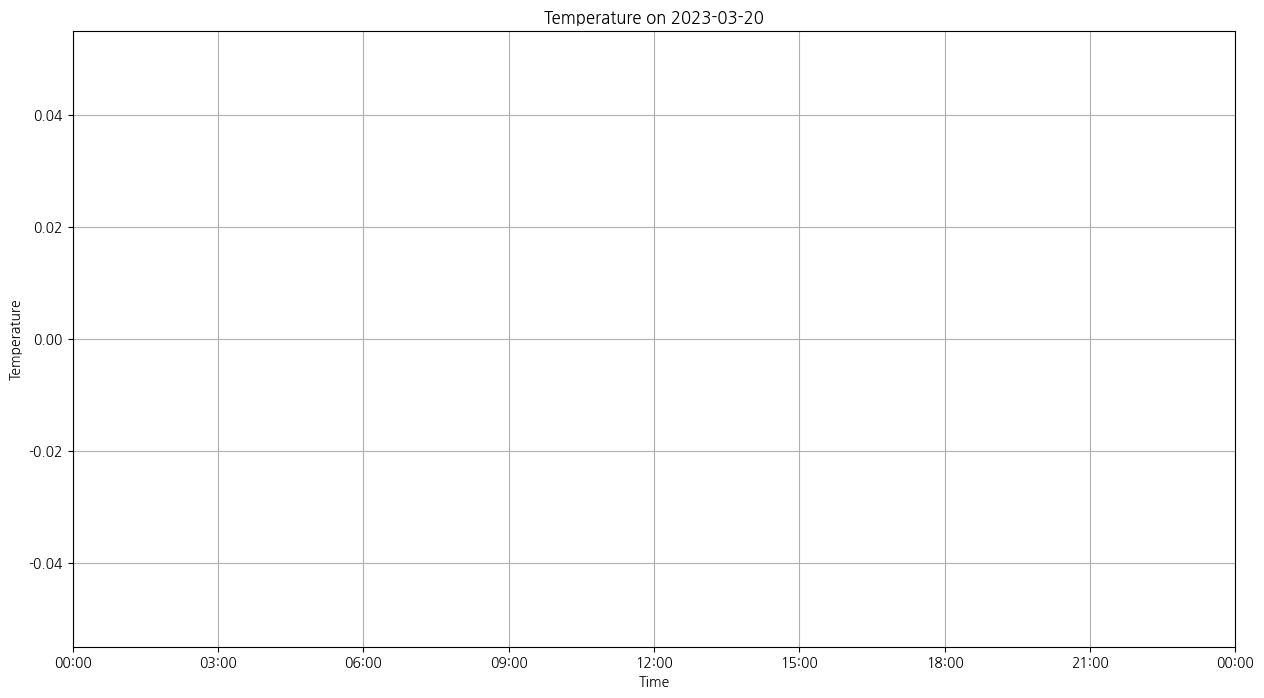

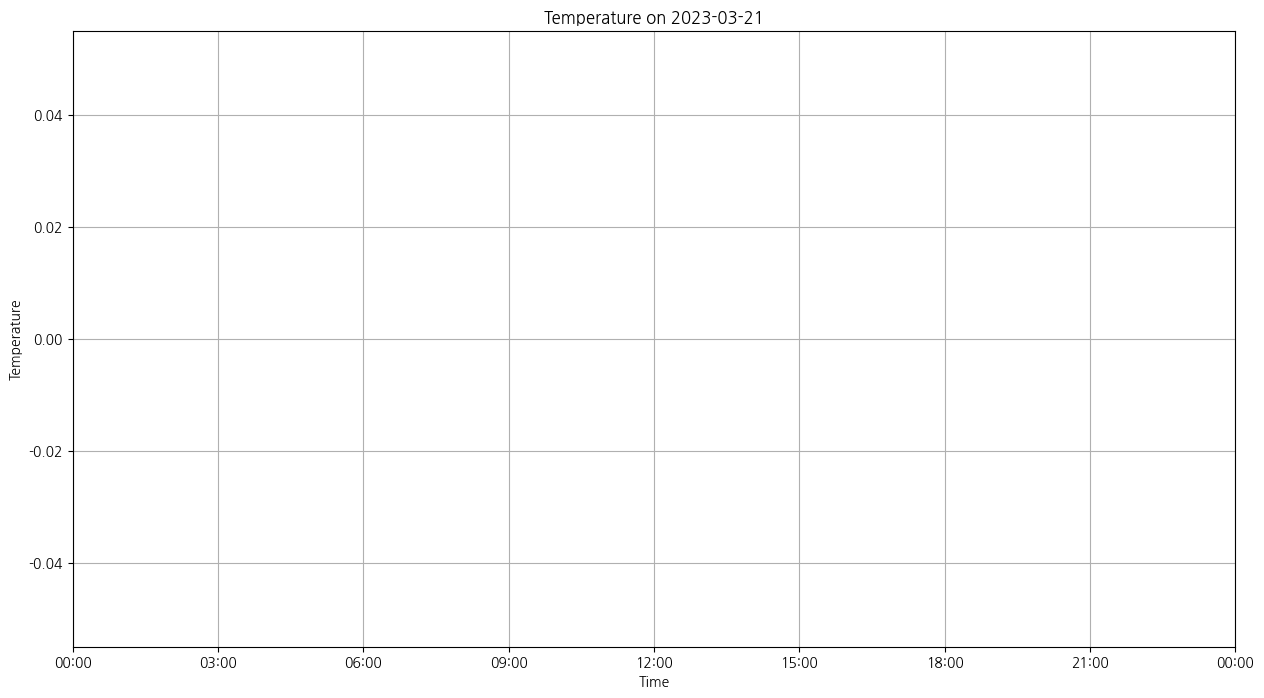

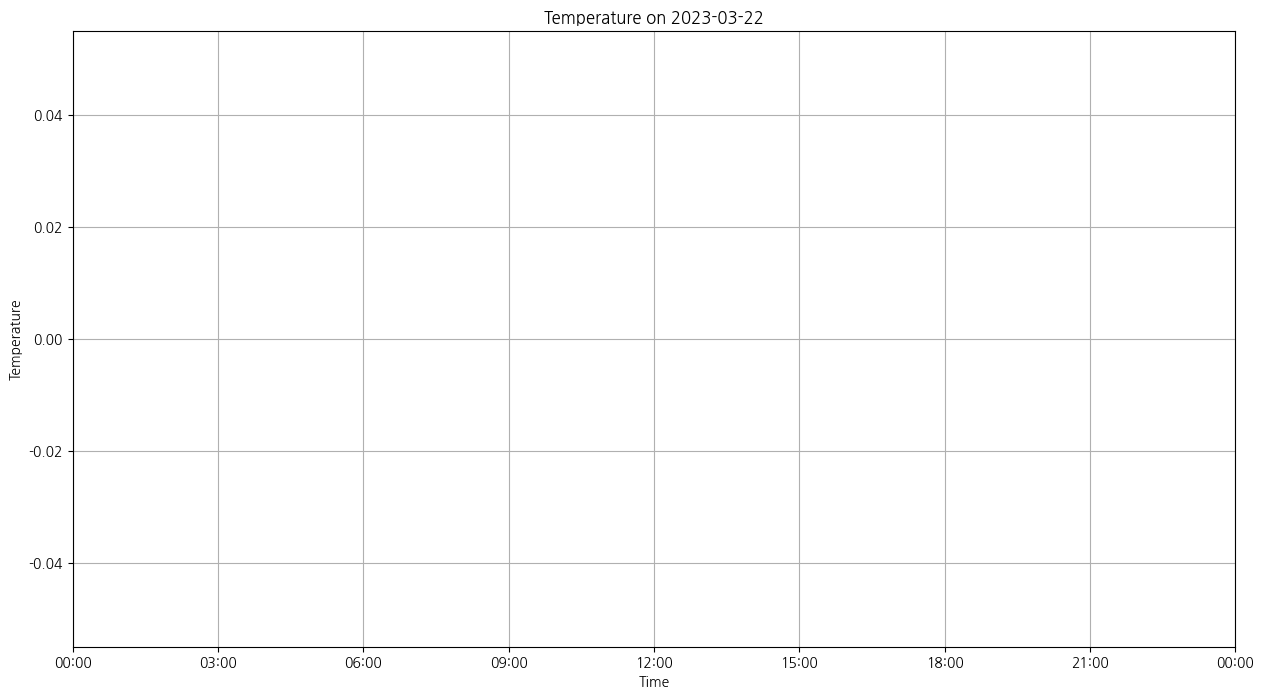

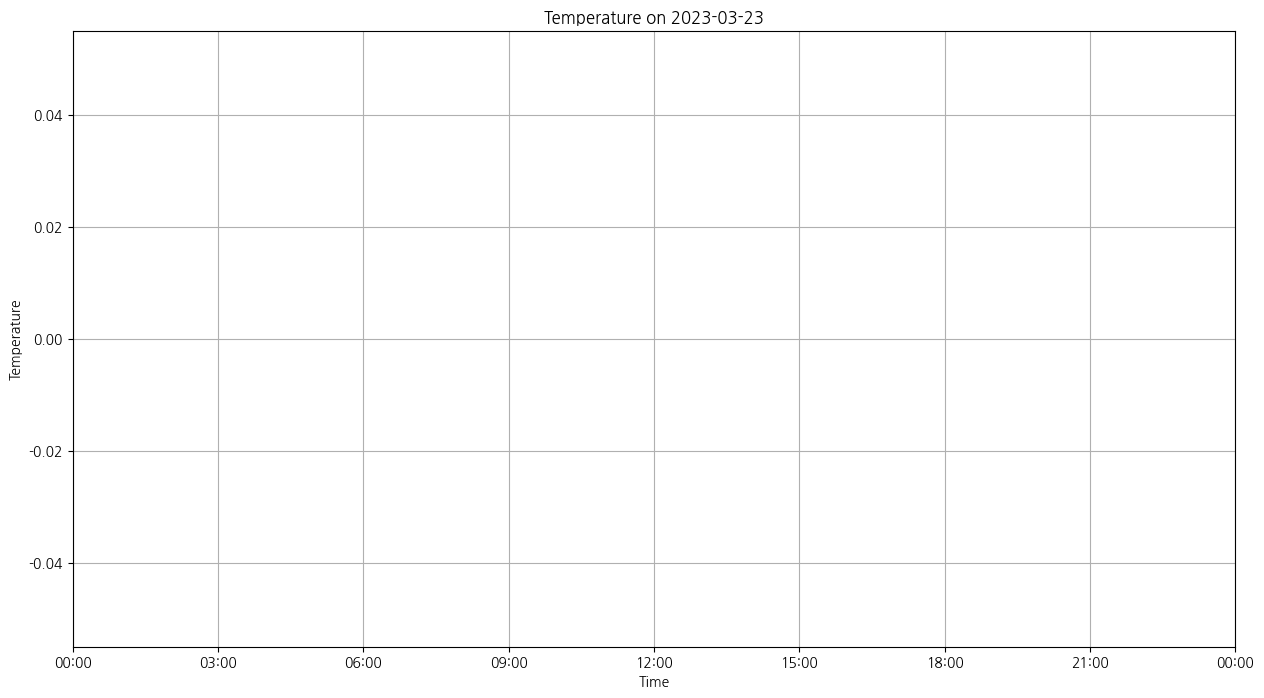

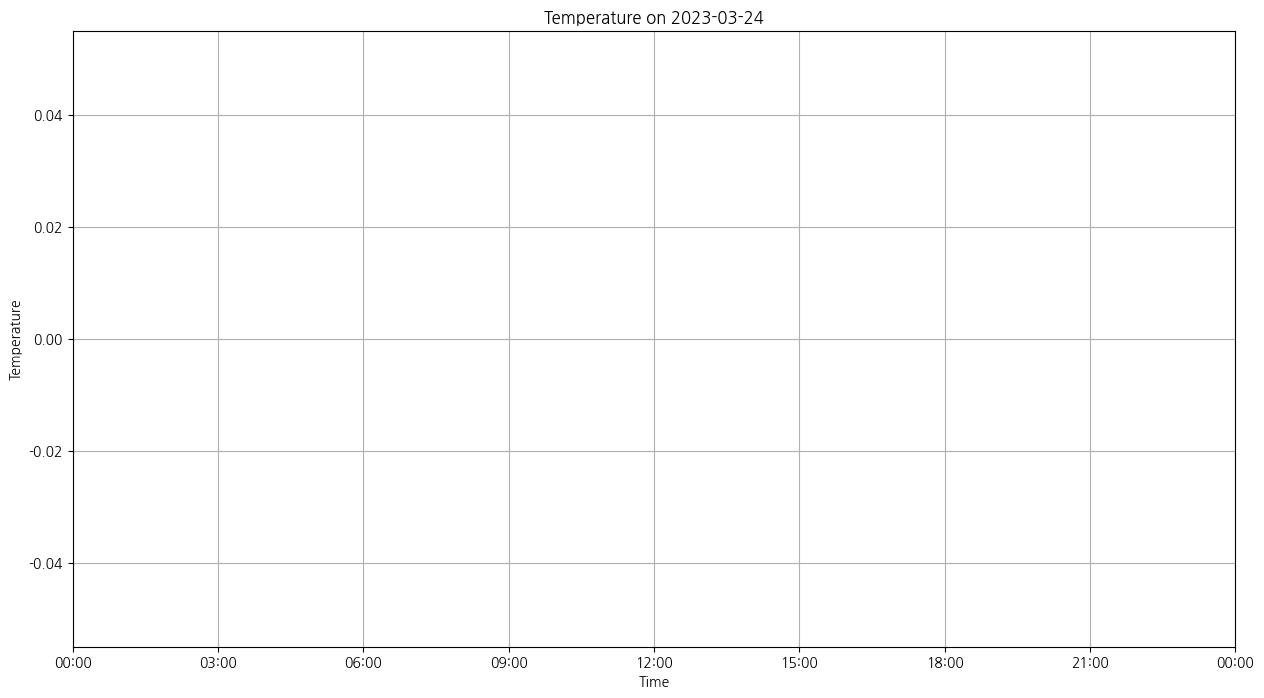

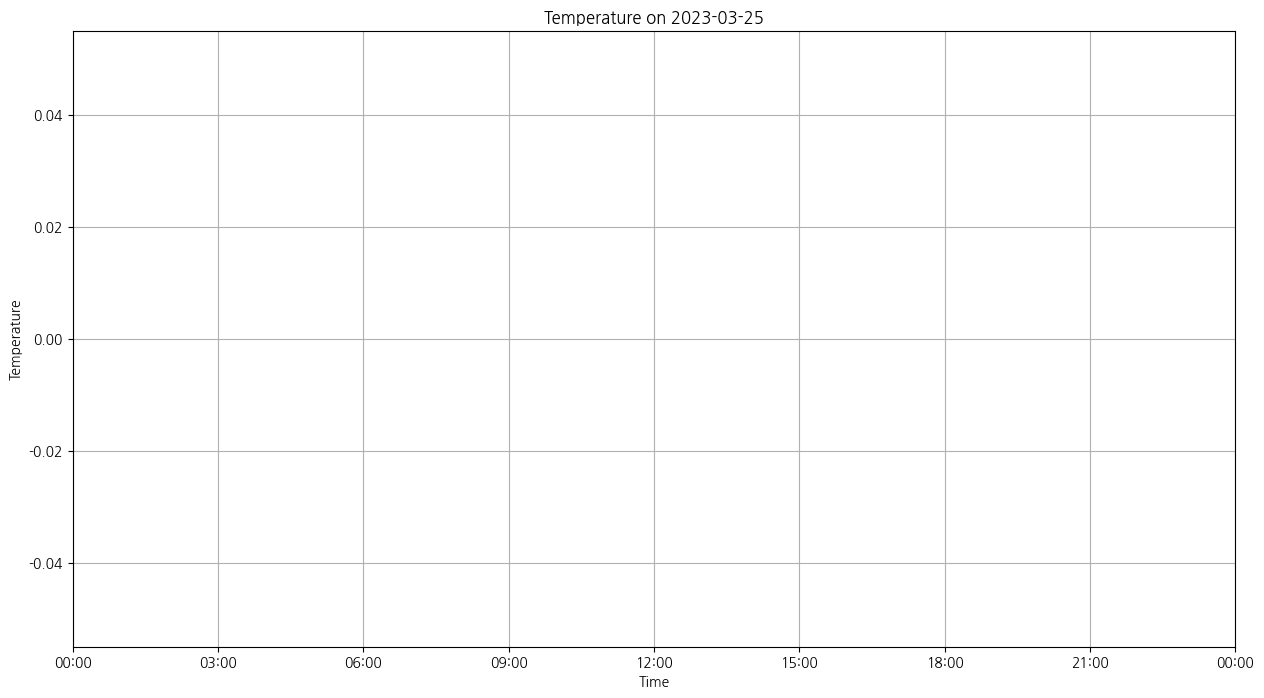

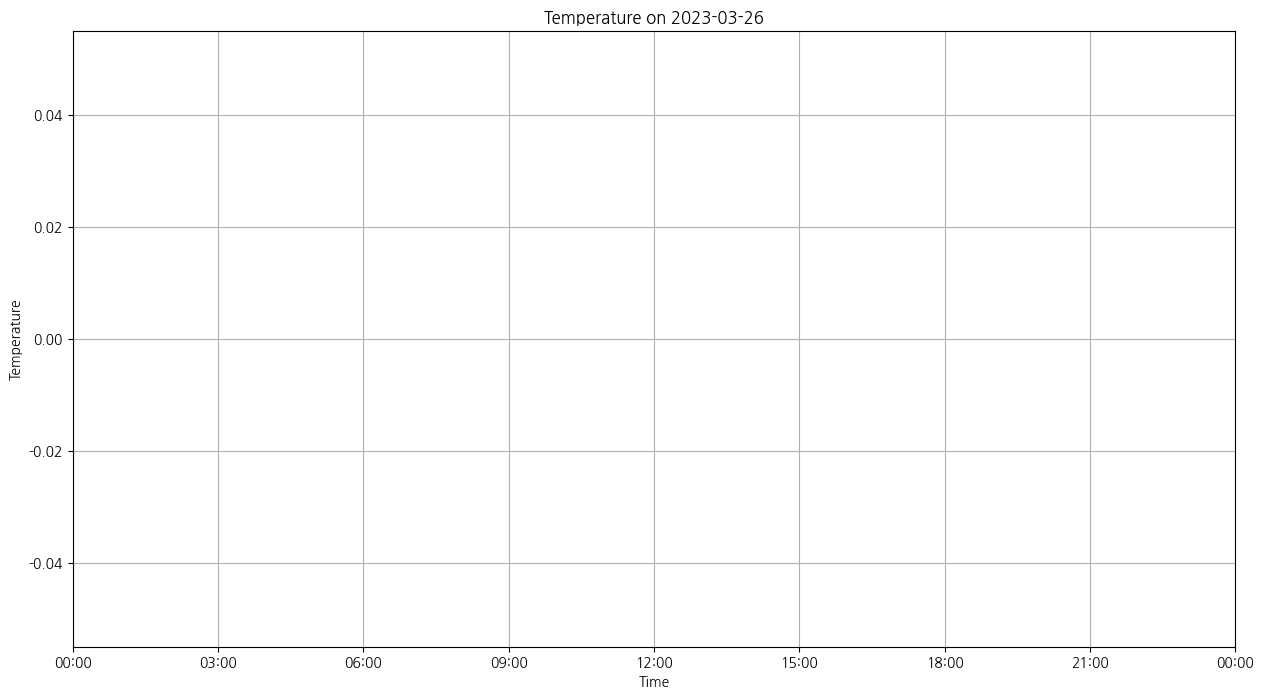

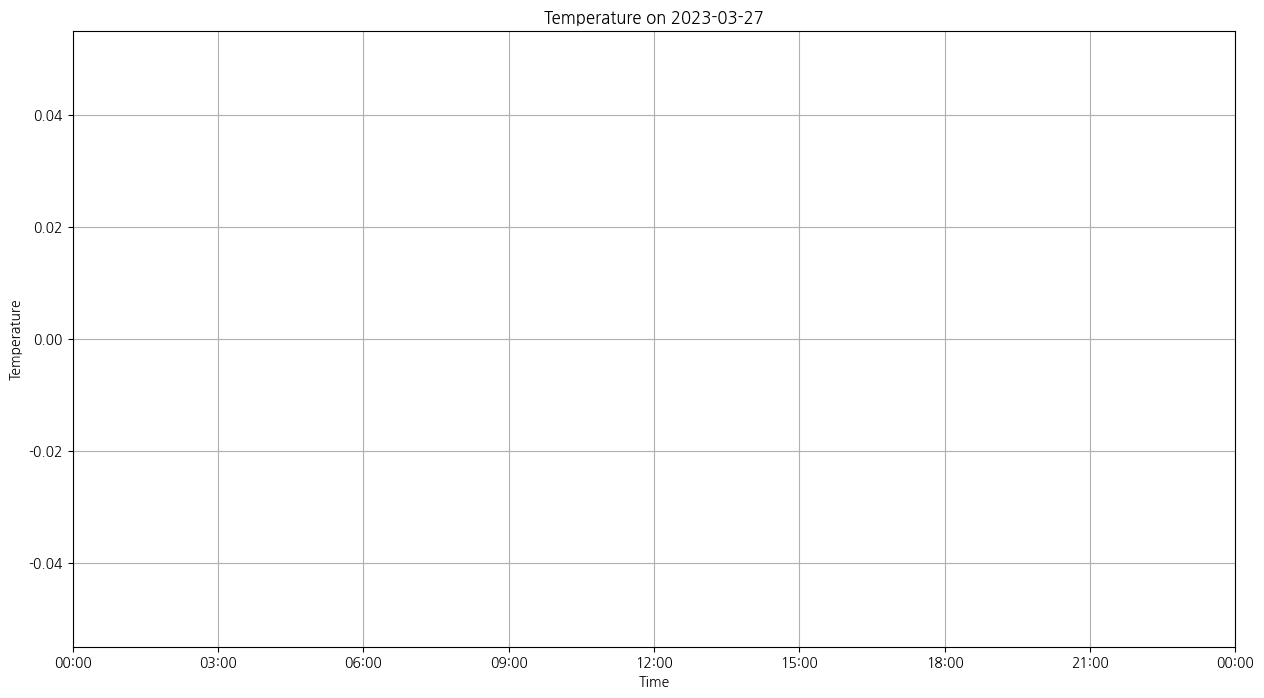

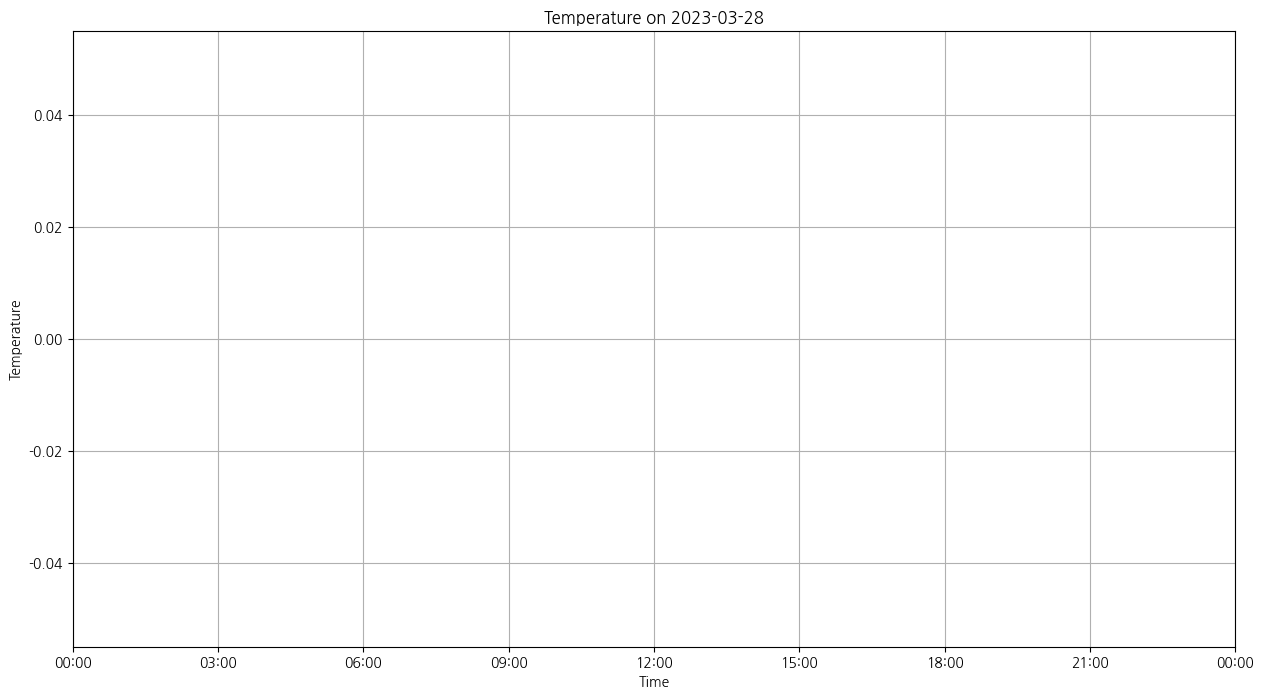

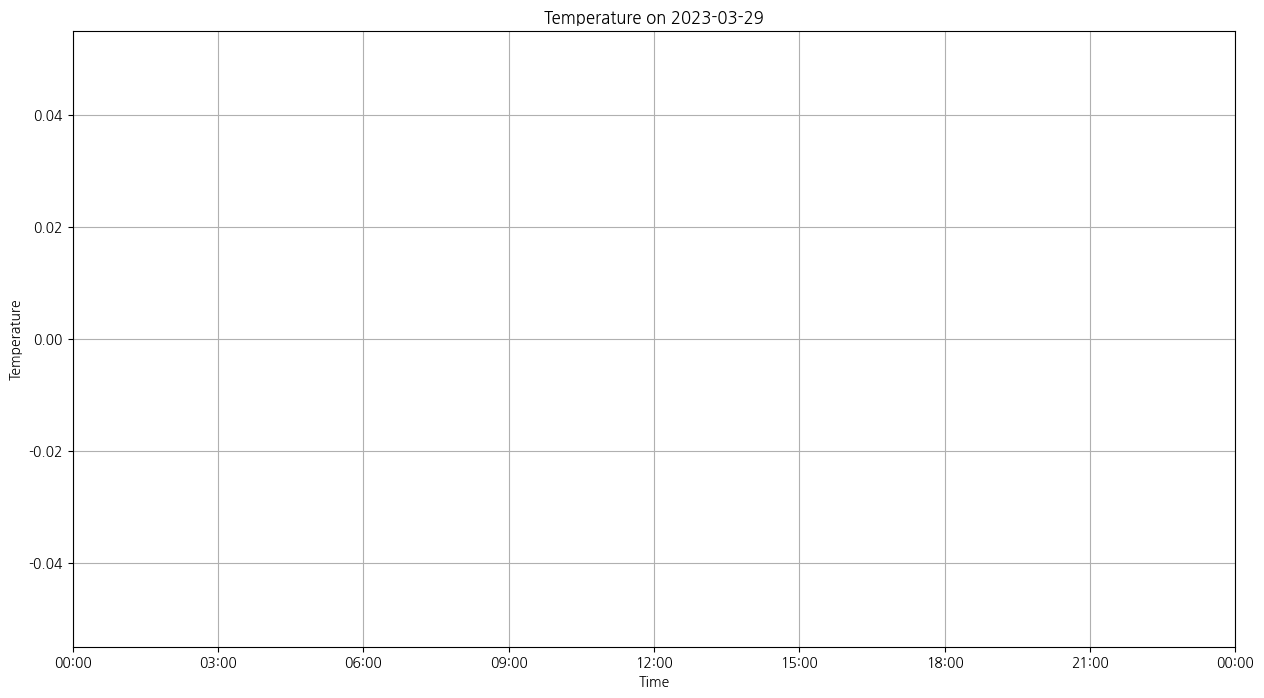

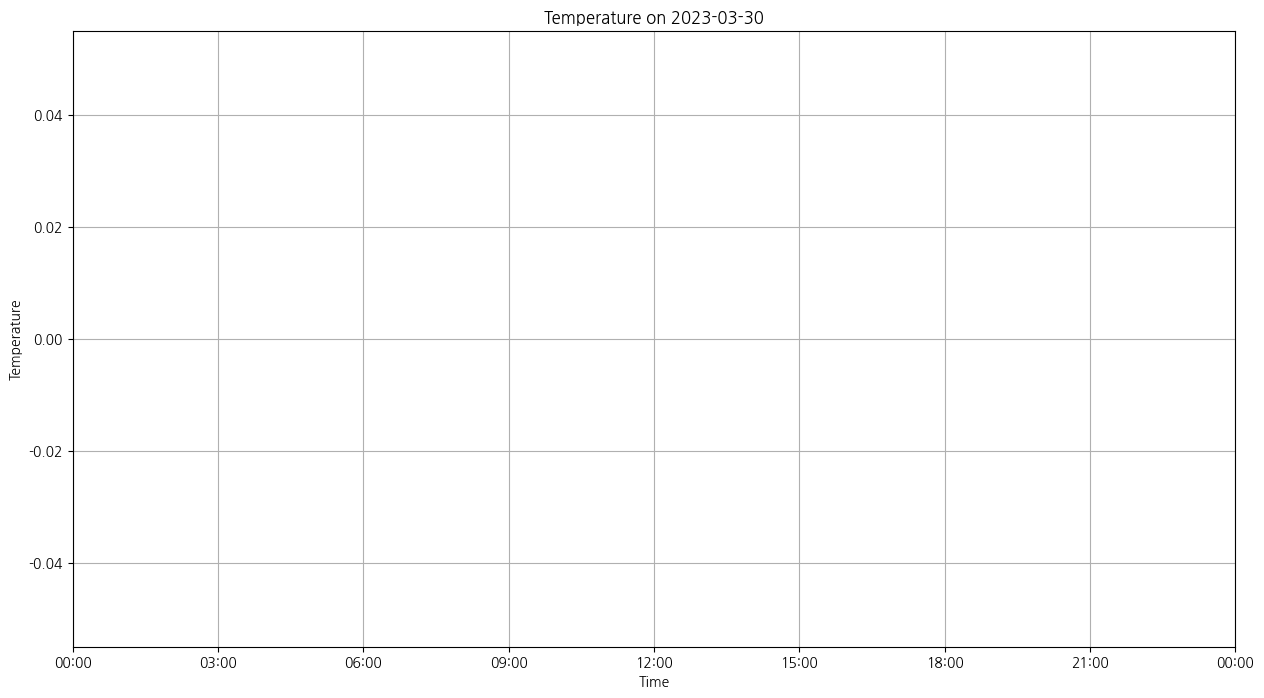

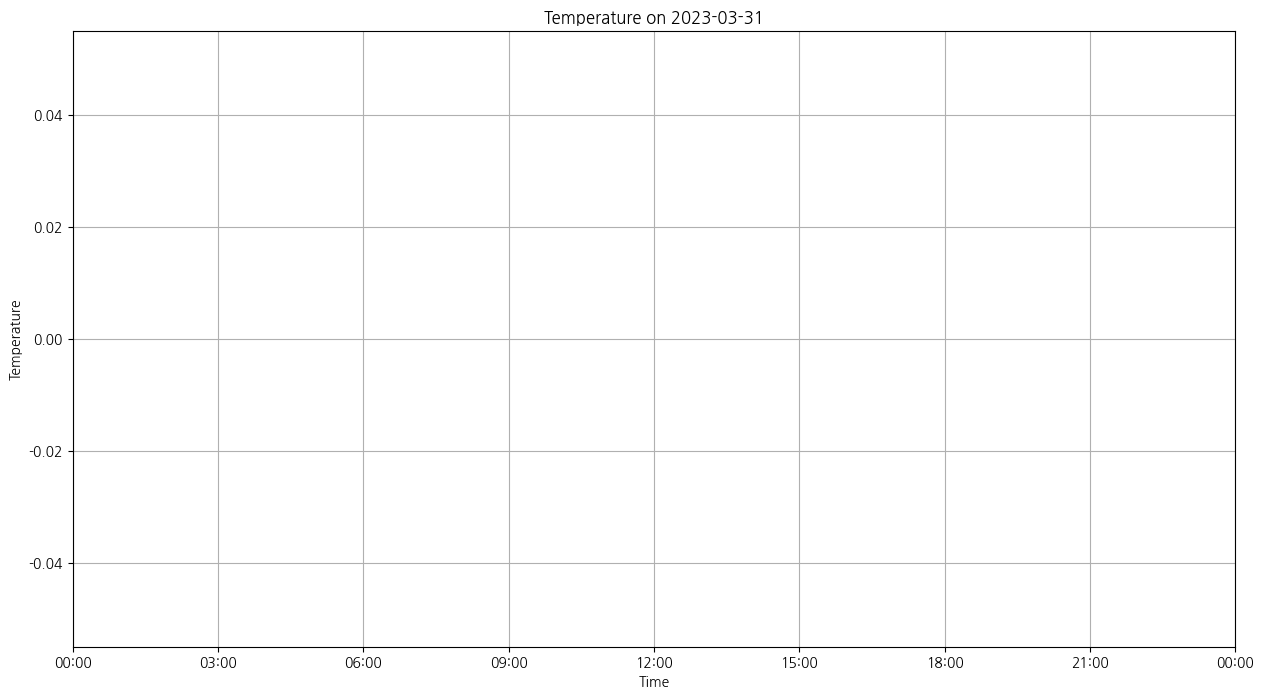

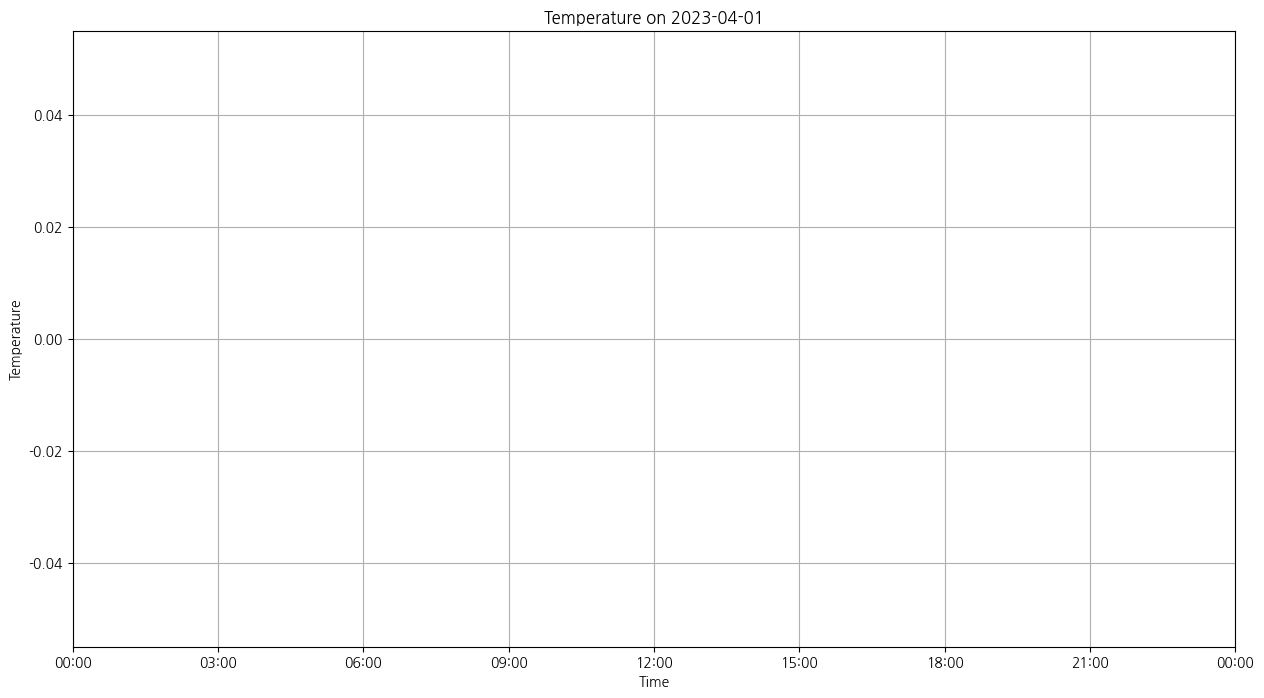

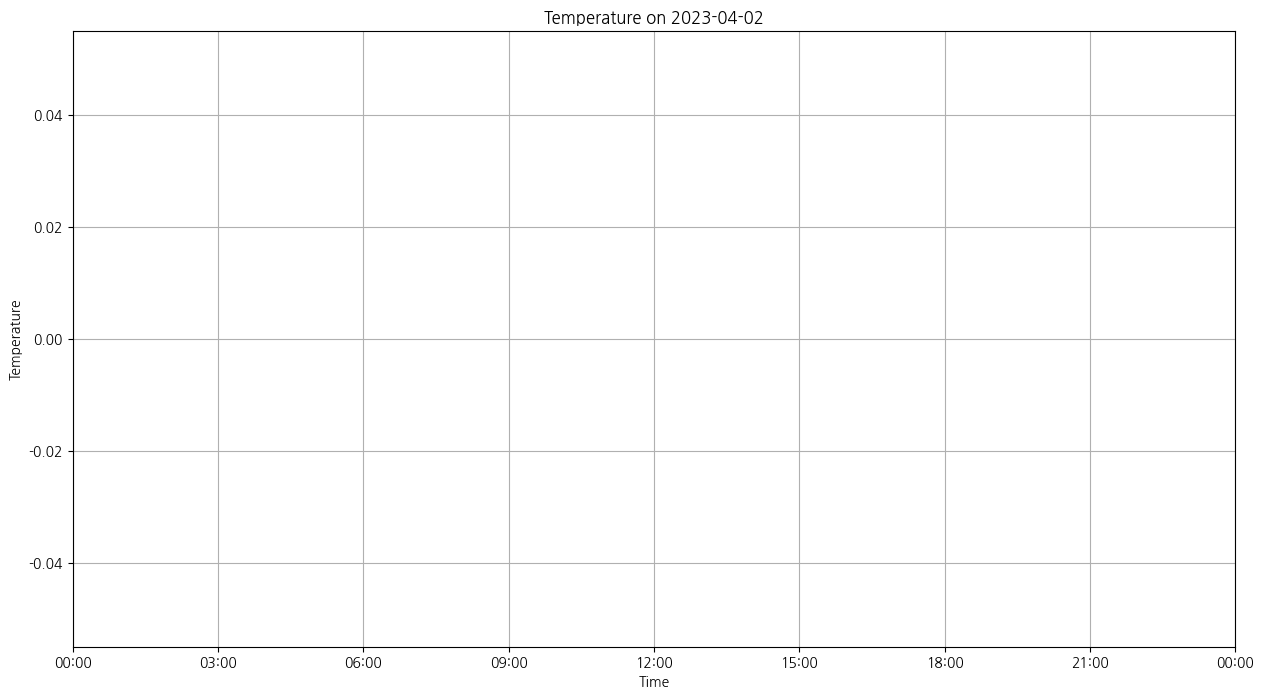

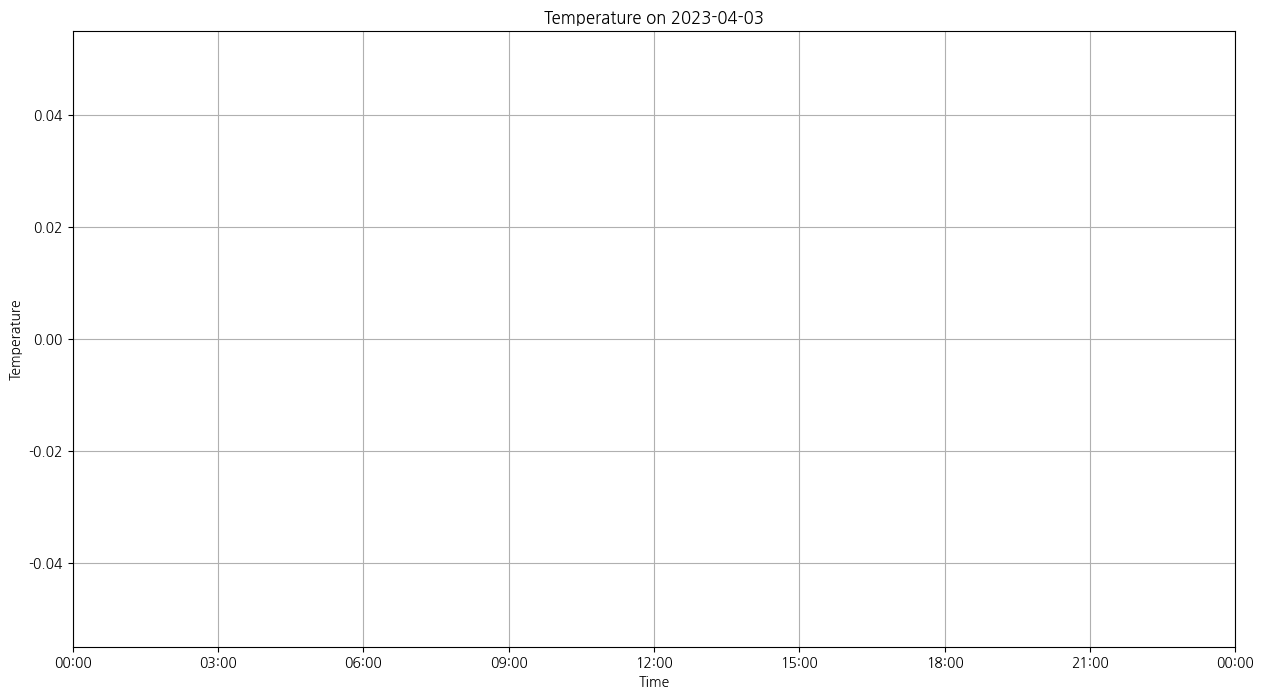

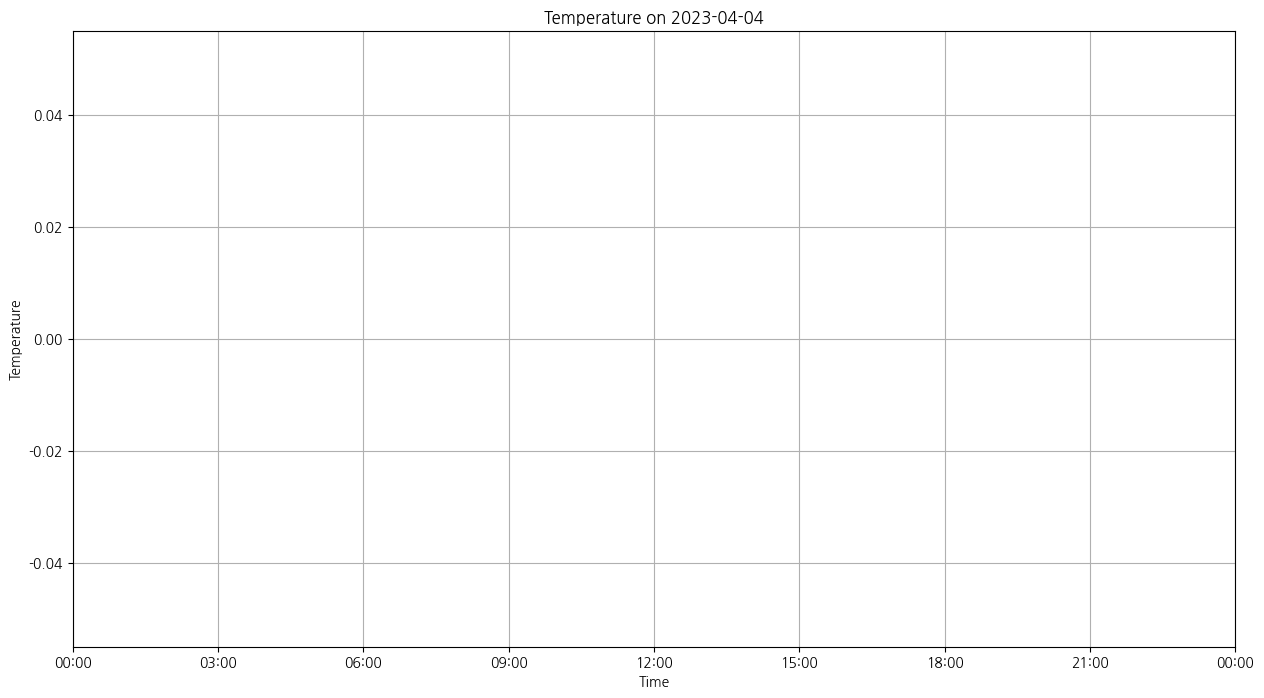

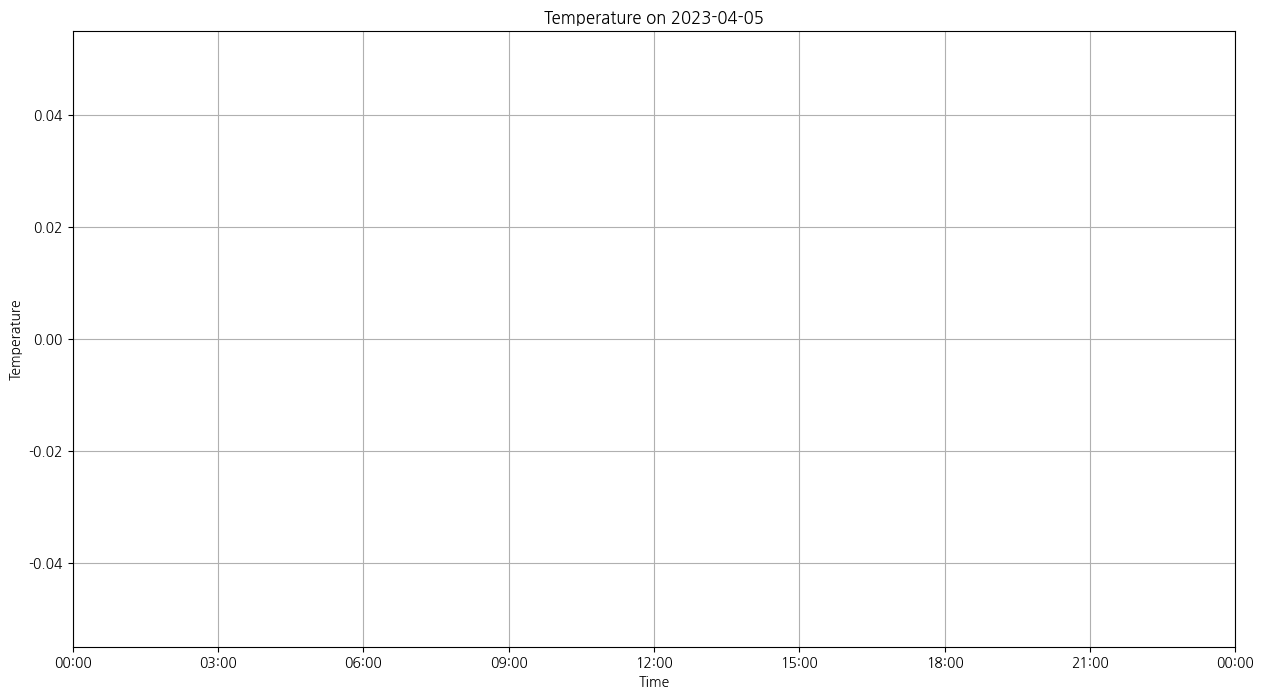

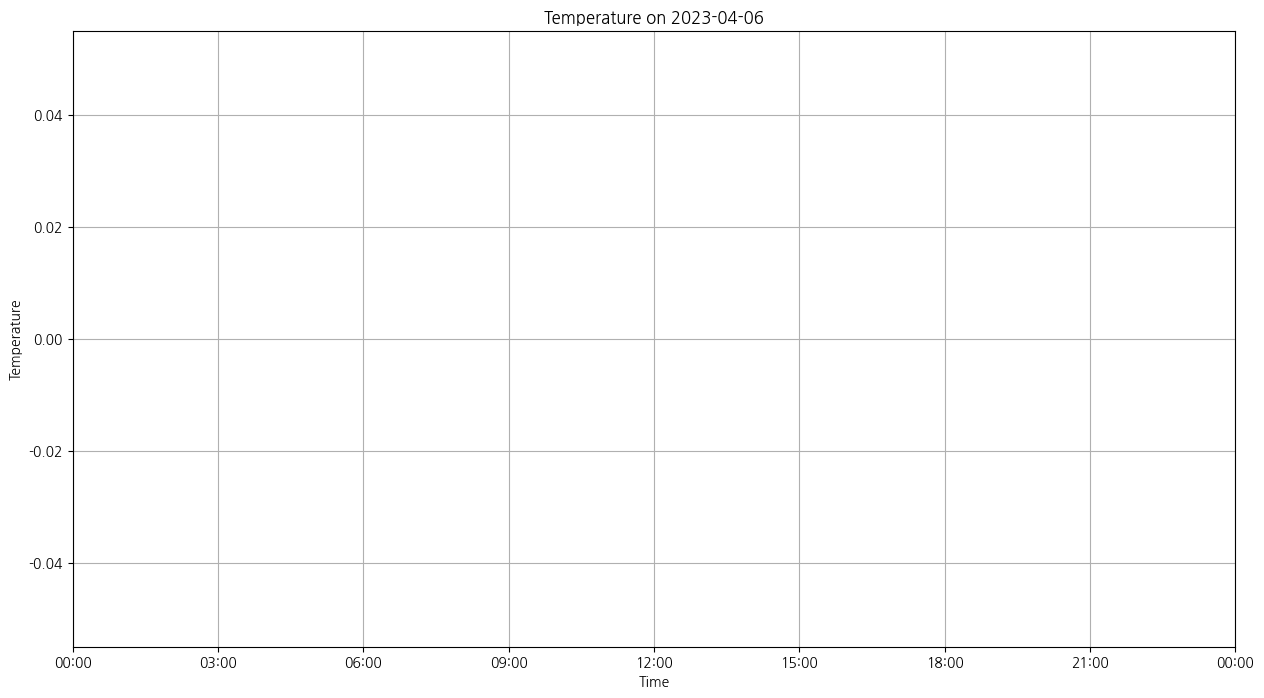

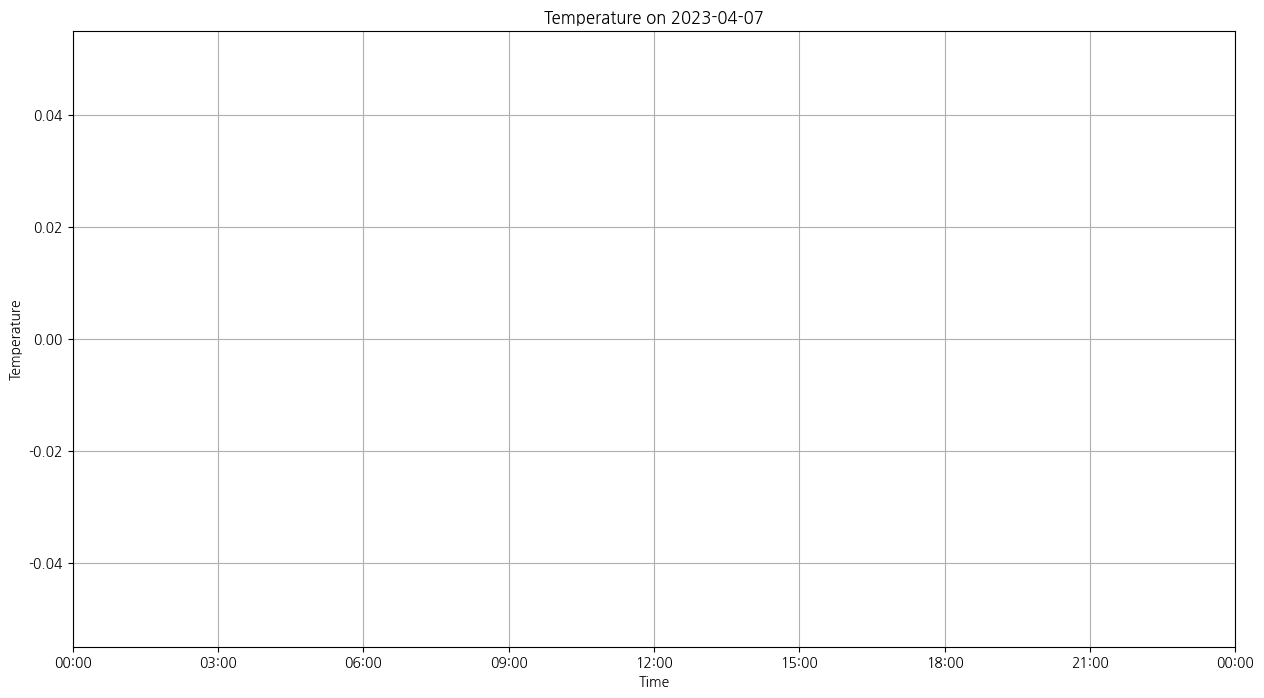

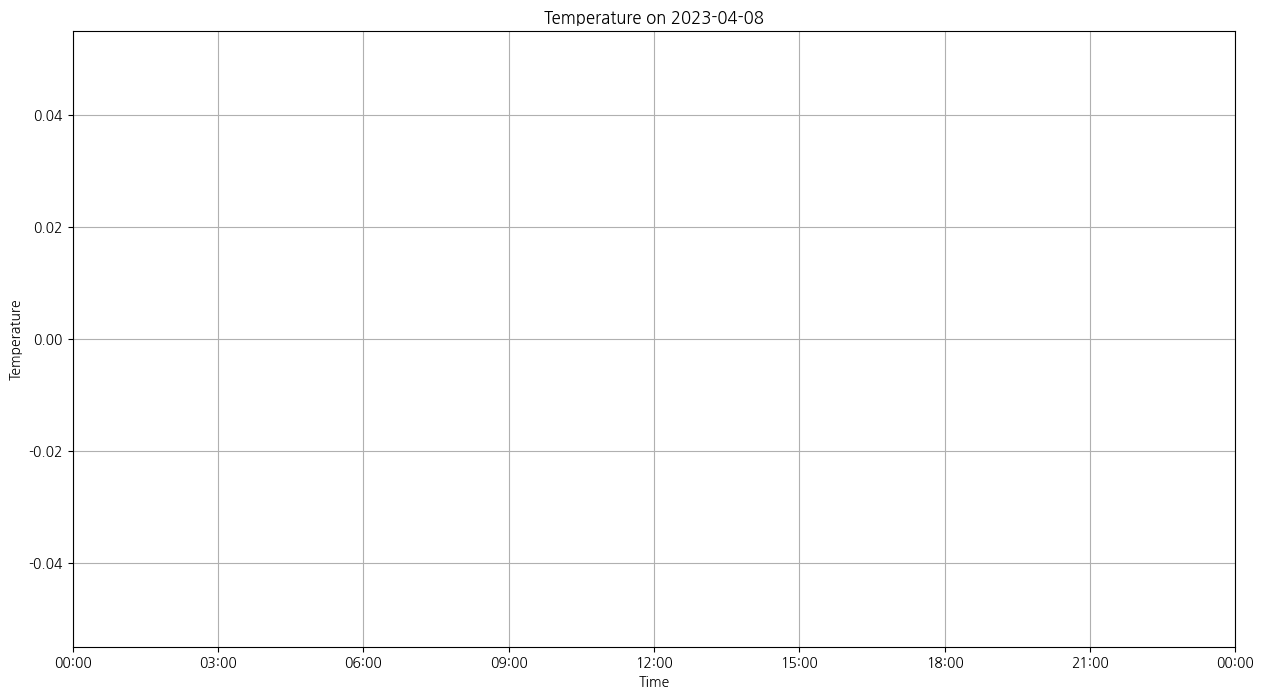

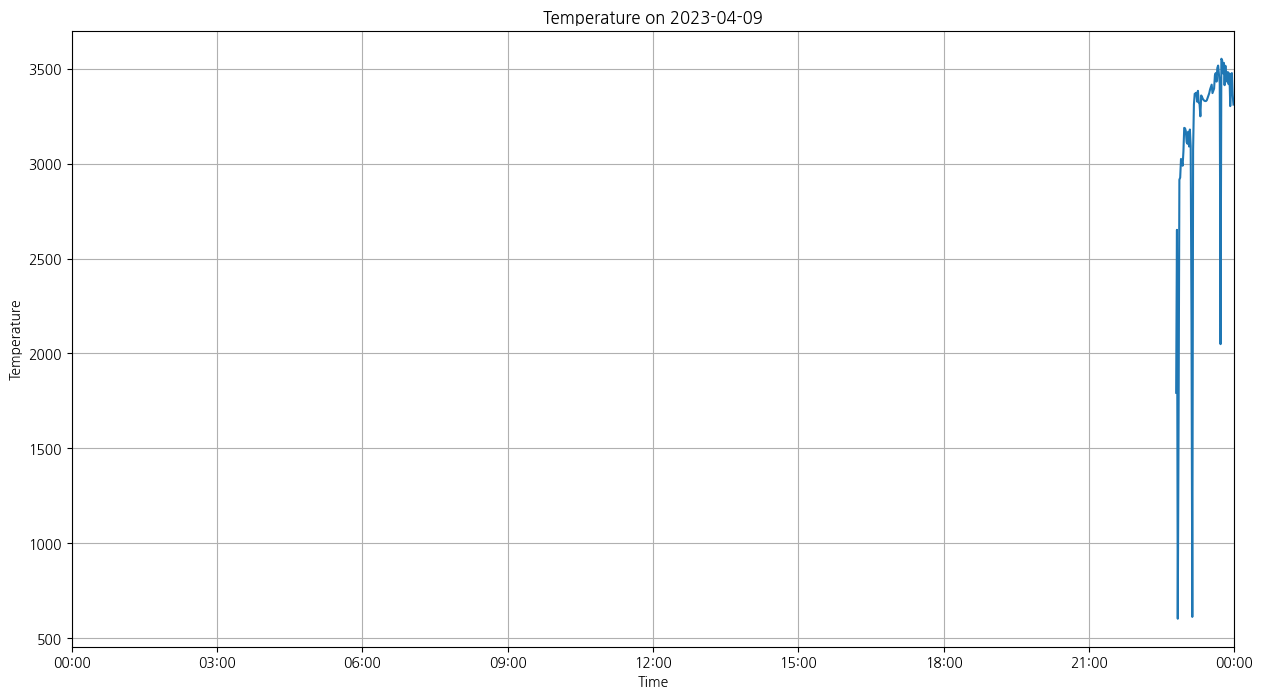

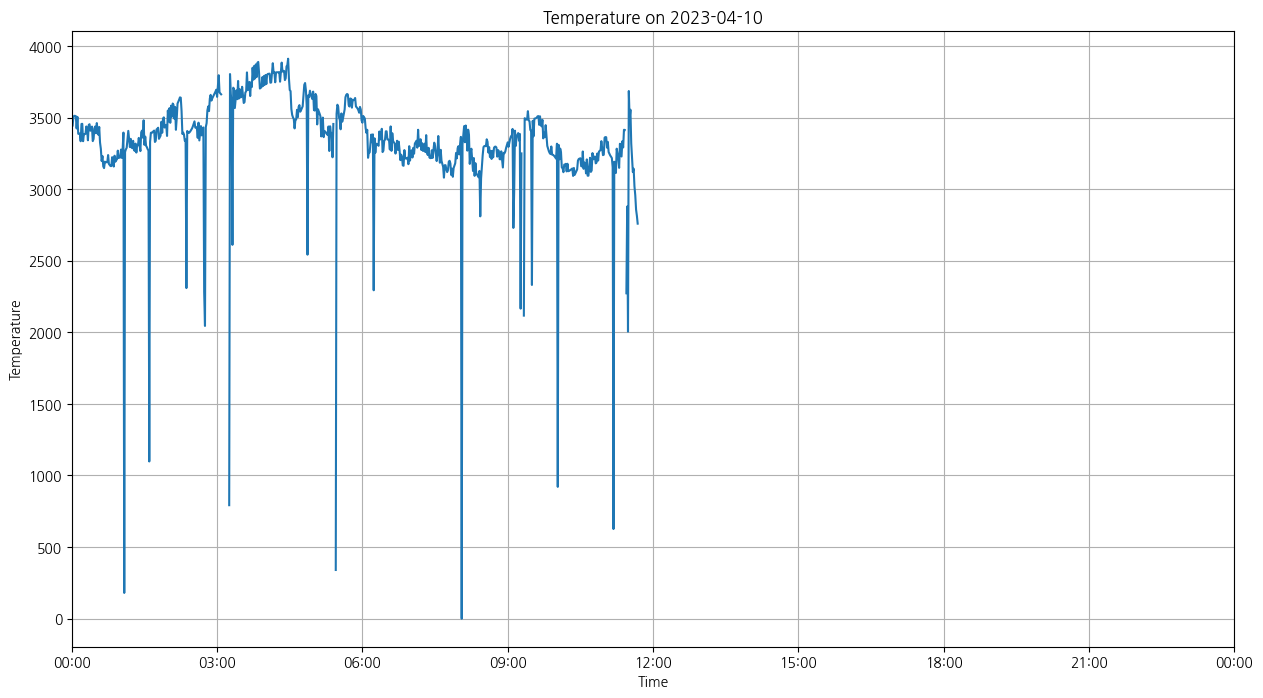

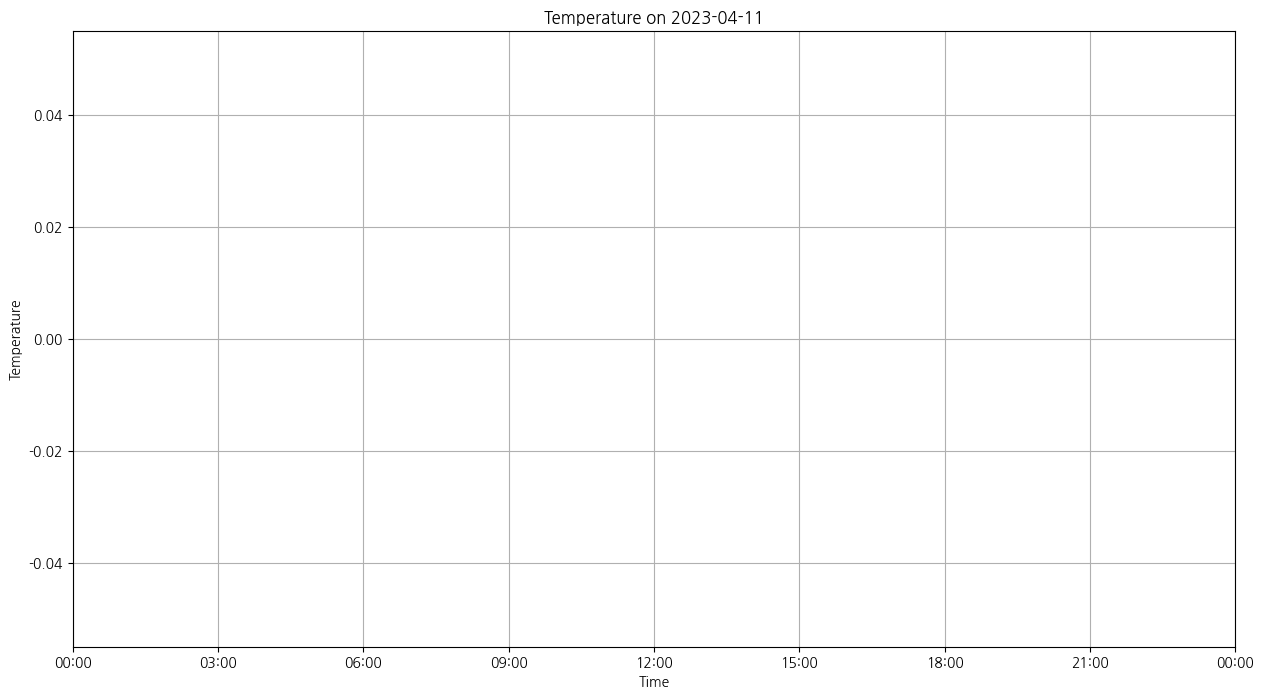

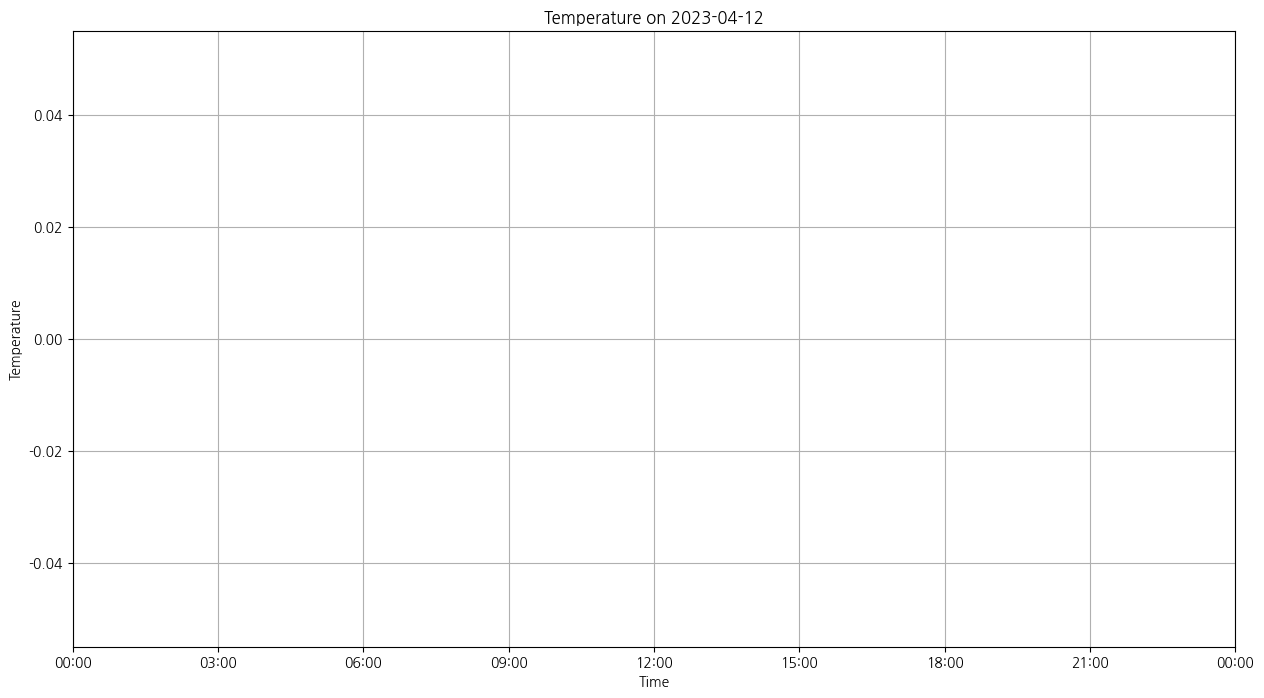

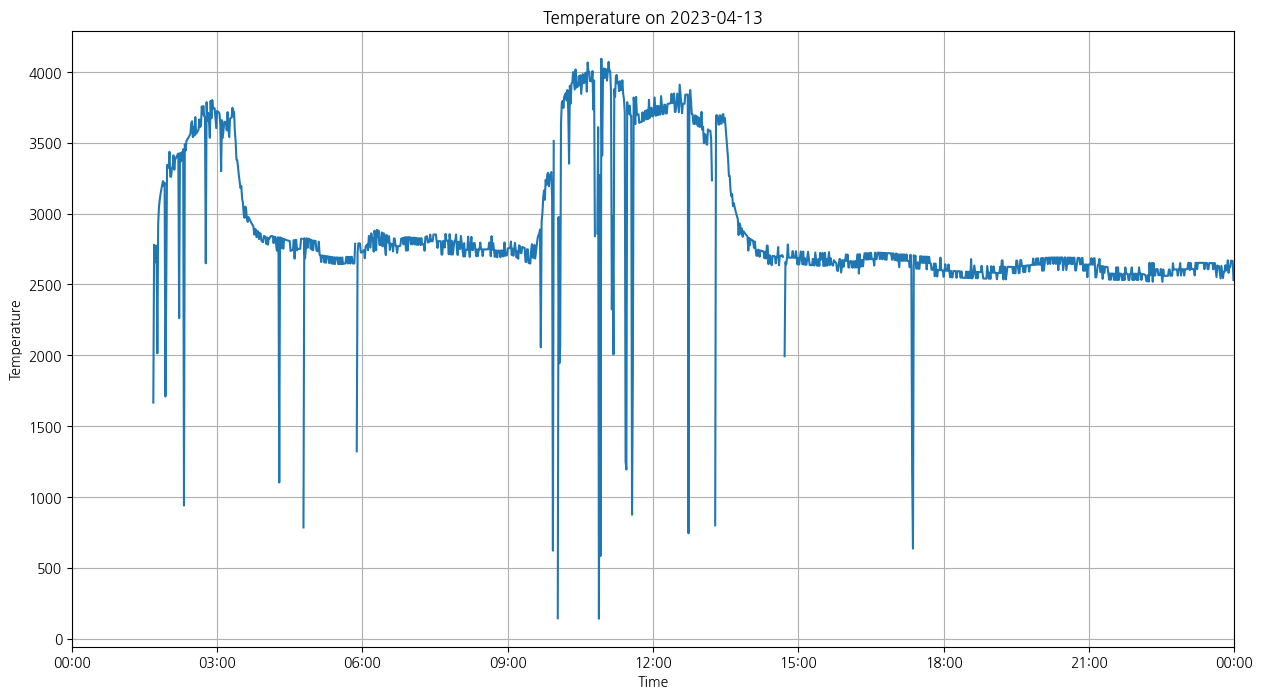

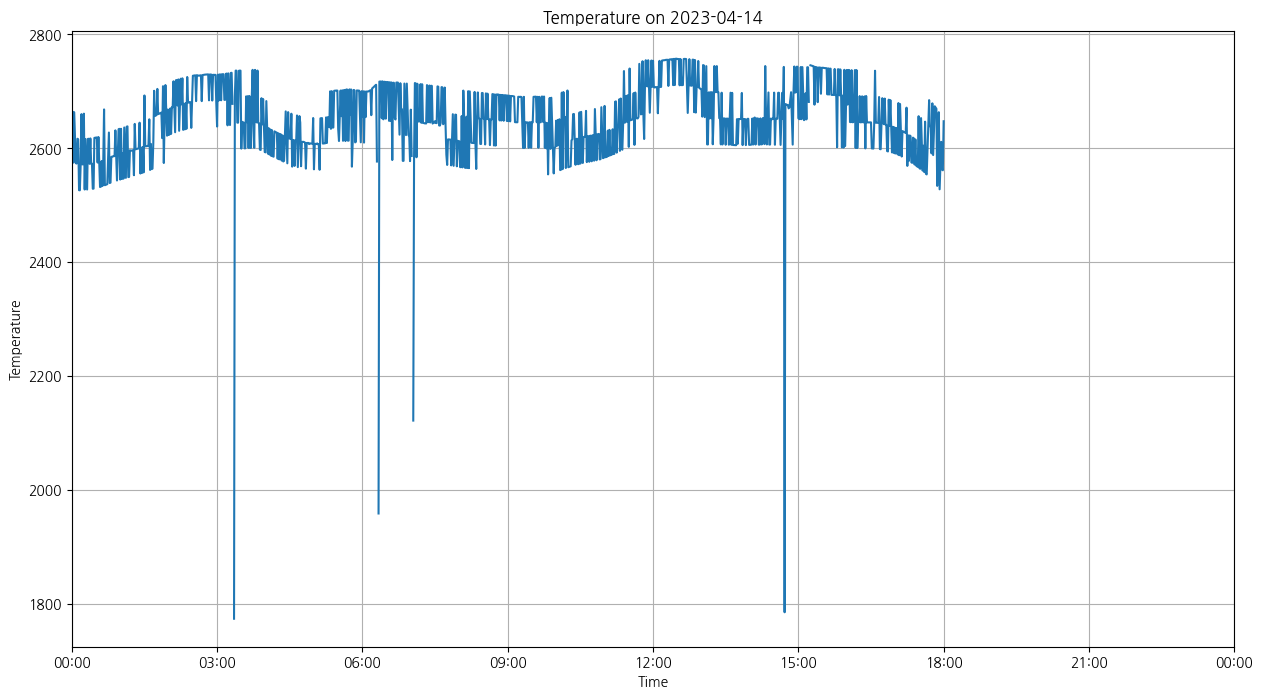

In [42]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


device_num = 2179
# 날짜 범위 설정 (2023-05-08 ~ 2023-11-13)
dates = pd.date_range(start=df[df["device_id"]==device_num].index.astype(str).str[:16].unique()[0], end=df[df["device_id"]==device_num].index.astype(str).str[:16].unique()[-1])

for date in dates:
    # 해당 날짜의 데이터만 선택
    df_day = df[df["device_id"]==device_num].loc[str(date.date())]

    # 데이터를 시각화
    plt.figure(figsize=(15,8))
    plt.plot(df_day.index, df_day['temperature'])

    # x축을 시간 단위로 설정
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # x축 범위를 00시부터 24시까지로 설정
    ax.set_xlim([pd.Timestamp(str(date.date())), pd.Timestamp(str(date.date())) + pd.DateOffset(days=1)])

    # # 데이터가 존재하는 시간에 맞춰 x축 눈금을 설정
    # ax.set_xticks(df_day.index)

    # 그래프의 제목과 x축, y축 레이블을 설정
    plt.title(f'Temperature on {date.date()} - device_id: {device_num}')
    plt.xlabel('Time')
    plt.ylabel('Temperature')

    # 그리드를 표시
    plt.grid(True)

    # 그래프를 출력
    plt.show()